# 삼박자 - 최종 프로젝트

코드 진행상황

# PART 1: Data Preprocessing

### Import library & Load data

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import ast
warnings.filterwarnings('ignore')
os.chdir("/Users/jun/GitStudy/Data_4/Data/project5")

In [2]:
os.listdir()

['imfrom_reviews.csv',
 '.DS_Store',
 'imfrom_items.csv',
 'Dr_jart_items.csv',
 'skinsort_0115.csv',
 'amazon_df(ver_1).csv',
 'cosrx_reviews.csv',
 'amazon_reviews_df.csv',
 'tiktok_post_k_beauty_0121 copy.csv',
 'joseon_reviews.csv',
 'tiktoker_crawling_df_0121.csv',
 '(중간제출용) 3beaty_인디뷰티_아마존전략_v2_0123.pptx',
 'script',
 'purito_items.csv',
 'results',
 'Dr_jart_reviews.csv',
 'KCI_FI003159756.pdf',
 'joseon_items.csv',
 '중간발표',
 '(중간제출용) 3조_PPT_v2.pptx',
 'amazon_df(ver_2).csv',
 'cosrx_items.csv',
 'tiktok',
 'amazon_items_df.csv',
 'purito_reviews.csv',
 'image.png']

In [3]:
# 데이터셋 불러오기
dr_items = pd.read_csv('Dr_jart_items.csv',index_col=False)
dr_reviews = pd.read_csv('Dr_jart_reviews.csv',index_col=False)
cs_items = pd.read_csv('cosrx_items.csv',index_col=False)
cs_reviews = pd.read_csv('cosrx_reviews.csv',index_col=False)
if_items = pd.read_csv('imfrom_items.csv',index_col=False)
if_reviews = pd.read_csv('imfrom_reviews.csv',index_col=False)
bj_items = pd.read_csv('joseon_items.csv',index_col=False)
bj_reviews = pd.read_csv('joseon_reviews.csv',index_col=False)
pu_items = pd.read_csv('purito_items.csv',index_col=False)
pu_reviews = pd.read_csv('purito_reviews.csv',index_col=False)
skinsort = pd.read_csv('skinsort_0115.csv',index_col=False)

In [4]:
# 분석 & 전처리용으로 원본 데이터 복사
dr_items_copy = dr_items.copy()
dr_reviews_copy = dr_reviews.copy()
cs_items_copy = cs_items.copy()
cs_reviews_copy = cs_reviews.copy()
if_items_copy = if_items.copy()
if_reviews_copy = if_reviews.copy()
bj_items_copy = bj_items.copy()
bj_reviews_copy = bj_reviews.copy()
pu_items_copy = pu_items.copy()
pu_reviews_copy = pu_reviews.copy()
skinsort_copy = skinsort.copy()

In [5]:
# 데이터 전처리
# 'brand'가 없거나 다른 데이터 확인 / 각 파일마다 다르게 정리하기!
# 이유 - 브랜드별 아이템만 추출했기 때문 + 세부사항에 브랜드명 작성되어 있으니 그것보고 판단

# 브랜드 명 변경
brand_list = ['Dr.Jart+', 'COSRX', "I'm from", 'Beauty of Joseon','PURITO']

In [6]:
dr_items_copy['brand'].replace('No brand', brand_list[0], inplace=True)
cs_items_copy['brand'].replace('No brand', brand_list[1], inplace=True)
if_items_copy['brand'].replace('No brand', brand_list[2], inplace=True)
bj_items_copy['brand'].replace('No brand', brand_list[3], inplace=True)
pu_items_copy['brand'].replace('No brand', brand_list[4], inplace=True)

In [7]:
# items_df들의 컬럼 수정을 위해 df를 list에 포함시키기
items_list = [dr_items_copy, cs_items_copy, if_items_copy, bj_items_copy, pu_items_copy]

# reviews_df들의 컬럼 수정을 위해 df를 list에 포함시키기
reviews_list = [dr_reviews_copy, cs_reviews_copy, if_reviews_copy, bj_reviews_copy, pu_reviews_copy]

In [8]:
# items_df들의 결측치 한번에 처리
def preprocess_items(df_items):
    
    df_items['best_sellers_rank_Feature'].replace('No result', np.nan, inplace=True)
    df_items['global_rating_count'].replace('No rating', np.nan, inplace=True)
    df_items['Special_Feature'].replace('No special feature', np.nan, inplace=True)

for i in range(len(items_list)):
    preprocess_items(items_list[i])

In [9]:
# reviews_df들의 결측치 한번에 처리
def preprocess_reviews(df_reviews):
    
    df_reviews['date'].replace('No date', np.nan, inplace=True)
    df_reviews['review_rating'].replace('No review', np.nan, inplace=True)

for i in range(len(reviews_list)):
    preprocess_reviews(reviews_list[i])

In [10]:
# review_df : reivew content가 없을 경우 제거
def dropna_reviews(reviews_df):
    reviews_df.dropna(inplace=True)
    reviews_df.reset_index(inplace=True)

In [11]:
# review data 결측치 제거
for i in range(len(reviews_list)):
    dropna_reviews(reviews_list[i])

In [12]:
# 컬럼 수정 한번에 진행하기!

# df_items : description 컬럼
def preprocess_description(df_items):
    
    for i in range(len(df_items)):
        description = ast.literal_eval(df_items.description[i])
        
        for key, value in description.items():
            if key not in df_items.columns:
                df_items[key] = np.nan
            df_items.loc[i, key] = value
            
    df_items.drop(columns=['description'], inplace=True)

# df_items : detail_dict 컬럼
def preprocess_detail_dict(df_items):
    
    for i in range(len(df_items)):
        detail_dict = ast.literal_eval(df_items.detail_dict[i])
        
        for key, value in detail_dict.items():
            if key not in df_items.columns:
                df_items[key] = np.nan
            df_items.loc[i, key] = value
            
    df_items.drop(columns=['detail_dict'], inplace=True)
    
# df_items : best_sellers_rank_Feature 컬럼을 세부 컬럼으로 나누기
def preprocess_best_sellers_col(df_items):

        for i in range(len(df_items)):
            try:
                value = df_items.best_sellers_rank_Feature[i]
                
                if pd.isna(value): #np.nan 인 애들
                    # print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                    continue
                
                if isinstance(value, float): # float 타입인 애들
                    value = str(value)
                    print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                
                cat_list = df_items.best_sellers_rank_Feature[i].split('#')
                
                df_items.loc[i, 'Category'] = cat_list[1]
                df_items.loc[i, 'Sub_Category'] = cat_list[2]
                
                detail_list = df_items.Category[i].split('in')
                
                df_items.loc[i, 'Category_Rank']= detail_list[0]
                df_items.loc[i, 'Category_Name']= detail_list[1]
                
                df_items.loc[i, 'Category_Name'] = df_items.Category_Name[i].split('(')[0]
                
                sub_list = df_items.Sub_Category[i].split('in')
                
                df_items.loc[i, 'Sub_Category_Rank']= sub_list[0]
                df_items.loc[i, 'Sub_Category_Name']= sub_list[1]
                    
            except Exception as e:
                print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                print(f"Error: {e}")
                
                continue
            
        df_items.drop(columns=['best_sellers_rank_Feature'], inplace=True)

In [13]:
# df_items들의 칼럼 수정 한번에 진행하기!
for i in range(len(items_list)) :
    preprocess_description(items_list[i])
    preprocess_detail_dict(items_list[i])
    preprocess_best_sellers_col(items_list[i])

In [14]:
# df_reviews : date, rating 컬럼
def preprocess_review_cols(df_reviews):

    for i in range(len(df_reviews)):
        try:
            if pd.isna(df_reviews.date[i]) or 'on' not in df_reviews.date[i]:
                # print(f"{i}, {df_reviews.date[i]} Passed")
                continue
            else:
                df_reviews.loc[i, 'review_date'] = df_reviews.date[i].split('on')[1]
                df_reviews.loc[i, 'review_date'] = pd.to_datetime(df_reviews.review_date[i])
            
            if pd.isna(df_reviews.review_rating[i]):
                print(f"{i}, {df_reviews.review_rating[i]} Passed")
                continue
            else:
                df_reviews.loc[i, 'review_rating'] = float(df_reviews.review_rating[i].split('out')[0])
        except Exception as e:
            print(f"{i}, {df_reviews.review_rating[i]}, Error: {e}")
            continue


In [15]:
# df_items들의 컬럼 한번에 수정하기
# 'review_date'를 날짜 형식으로 변경
for i in range(len(reviews_list)) :
    preprocess_review_cols(reviews_list[i])
    reviews_list[i]['review_date'] = pd.to_datetime(reviews_list[i]['review_date'])
    reviews_list[i].drop(columns=['date'], inplace=True)
    reviews_list[i]['review_rating'] = pd.to_numeric(reviews_list[i]['review_rating'], errors='coerce', downcast='integer')

In [16]:
reviews_list[0].head(3)

index      review_num        ASIN     customer_id          customer_name  \
0      0   B07DR5816K__0  B07DR5816K  R1AVY9U9QOGEMA                Kelli C   
1      1   B07DR5816K__1  B07DR5816K   R6EYDZA8D6SJ4        Amazon Customer   
2      2  B07DR5816K__10  B07DR5816K  R1HH7S9OB3F6F2  Wow! Major difference   

                                               title  review_rating  \
0  Dr.Jart+ Cicapair Tiger Grass Color Correcting...              3   
1  Dr.Jart+ Cicapair Tiger Grass Color Correcting...              3   
2  Dr.Jart+ Cicapair Tiger Grass Color Correcting...              5   

                                             content review_date  
0  Not as good as people hype it up to be. I’ll u...  2025-01-18  
1  Had to use this for a bit to give it a review....  2025-01-18  
2  Big chefs kiss to this product! I live by the ...  2025-01-03

In [17]:
dr_review_df = reviews_list[0].drop(columns="index")
cx_review_df = reviews_list[1].drop(columns="index")
im_review_df = reviews_list[2].drop(columns="index")
bj_review_df = reviews_list[3].drop(columns="index")
pr_review_df = reviews_list[4].drop(columns="index")

In [18]:
reviews_list = [dr_review_df,cx_review_df,im_review_df,bj_review_df,pr_review_df]

In [19]:
dr_items_df = items_list[0]
cx_items_df = items_list[1]
im_items_df = items_list[2]
bj_items_df = items_list[3]
pr_items_df = items_list[4]

In [20]:
items_list = [dr_items_df,cx_items_df,im_items_df,bj_items_df,pr_items_df]

In [21]:
def review_preprocess(review_df):
    # 컬럼명 변경, 불필요 컬럼 삭제, 인덱스 수정, 결측치 확인
    review_df.rename(columns={'content':'review_content'}, inplace=True)

    # review_rating
    review_df['review_rating'] = review_df['review_rating'].apply(
        lambda x: str(x) if not pd.isna(x) and isinstance(x, float) else x
    ).astype('float', errors='ignore')

    # review_date
    review_df['review_date'] = review_df['review_date'].apply(
        lambda x: pd.to_datetime(x) if not pd.isna(x) else None
    )

    review_df.reset_index(drop=True, inplace=True)

    review_df.info()
    review_df.head(2)
    # amazon_df.to_csv(DATA_PATH + 'amazon_df_0116.csv', encoding='utf-8')

In [22]:
def item_preprocess(item_df):

    # Category_Rank
    item_df['Category_Rank'] = item_df['Category_Rank'].apply(
        lambda x: str(x).replace(',', '') if not pd.isna(x) and isinstance(x, float) else x
    ).astype('str').apply(lambda x: x.replace(',', '') if x != 'nan' else None)

    # Sub_Category_Rank
    item_df['Sub_Category_Rank'] = item_df['Sub_Category_Rank'].apply(
        lambda x: str(x).replace(',', '') if not pd.isna(x) and isinstance(x, float) else x
    ).astype('str').apply(lambda x: x.replace(',', '') if x != 'nan' else None)
    item_df.reset_index(drop=True, inplace=True)

    item_df.info()
    item_df.head(2)
    # amazon_df.to_csv(DATA_PATH + 'amazon_df_0116.csv', encoding='utf-8')

In [23]:
# 언어 감지 및 번역을 위한 라이브러리
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import swifter
from deep_translator import GoogleTranslator

# 언어 감지
def detect_language(text):
    
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# 영어가 아닌 언어를 구글번역을 활용하여 영어로 번역
def translate_en(text):
    
    to_translate = text
    translated = GoogleTranslator(source='auto', target='english').translate(to_translate)
    
    return translated

In [24]:
bj_review_df.head()

review_num        ASIN     customer_id           customer_name  \
0   B083QCJPDD__0  B083QCJPDD  R3EPSN1ZWCF4CY  Stephanie Brooke Dowdy   
1   B083QCJPDD__1  B083QCJPDD  R1TWLDLFKIXWDI                     I J   
2  B083QCJPDD__10  B083QCJPDD  R34HB6IBWN3DVH                   Damla   
3  B083QCJPDD__11  B083QCJPDD  R2AAAFX82MASA3                   Jones   
4  B083QCJPDD__12  B083QCJPDD  R3AT92MPMFR70P              celesteina   

                                               title  review_rating  \
0  [Beauty of Joseon] Centella Asiatica Calming M...              5   
1  [Beauty of Joseon] Centella Asiatica Calming M...              5   
2  [Beauty of Joseon] Centella Asiatica Calming M...              3   
3  [Beauty of Joseon] Centella Asiatica Calming M...              5   
4  [Beauty of Joseon] Centella Asiatica Calming M...              2   

                                             content review_date  
0  This brand is quickly becoming my favorite. I ...  2025-01-14  
1  Love the masks. Leaves my face cool and soft a...  2025-01-05  
2  I always get excited when I buy new skincare, ...  2024-10-19  
3  Calmed my upset, blotchy, red trentotin skin i...  2024-10-19  
4   Sealed but there was not much serum on the mask.  2024-10-09

In [25]:
def text_preprocessing(review_df) :
    # str 형식이 아닐 경우 오류 방지를 위한 코드
    review_df['review_content'] = review_df['review_content'].fillna('').astype(str)

    # 리뷰 언어가 영어가 아닌 경우 -> 번역
    review_df['detected_language'] = review_df['review_content'].apply(lambda x: detect_language(x) if isinstance(x, str) else None)
    review_df.loc[review_df['detected_language'] != 'en', 'review_content'] = review_df.loc[review_df['detected_language'] != 'en', 'review_content'].apply(translate_en)

    print(review_df.head(2))

In [26]:
for i in range(len(reviews_list)):
    review_preprocess(reviews_list[i])
    text_preprocessing(reviews_list[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_num      1771 non-null   object        
 1   ASIN            1771 non-null   object        
 2   customer_id     1771 non-null   object        
 3   customer_name   1771 non-null   object        
 4   title           1771 non-null   object        
 5   review_rating   1771 non-null   float64       
 6   review_content  1771 non-null   object        
 7   review_date     1771 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 110.8+ KB
      review_num        ASIN     customer_id    customer_name  \
0  B07DR5816K__0  B07DR5816K  R1AVY9U9QOGEMA          Kelli C   
1  B07DR5816K__1  B07DR5816K   R6EYDZA8D6SJ4  Amazon Customer   

                                               title  review_rating  \
0  Dr.Jart+ Cicapair Tiger Grass C

In [27]:
cx_items_df.columns

Index(['ASIN', 'title', 'order', 'category', 'brand', 'price',
       'global_rating_count', 'Special_Feature', 'total_star_mean',
       'Ingredients', 'UPC', 'Manufacturer', 'Country of Origin',
       'Item model number', 'Product Dimensions',
       'Is Discontinued By Manufacturer', 'Manufacturer recommended age',
       'Date First Available', 'Batteries', 'Department', 'Package Dimensions',
       'Language', 'Category', 'Sub_Category', 'Category_Rank',
       'Category_Name', 'Sub_Category_Rank', 'Sub_Category_Name'],
      dtype='object')

In [28]:
def text_preprocessing_item(item_df) :
    # merge_df.to_csv(DATA_PATH + "amazon_koreaOnly_translated.csv", encoding='utf-8')
    item_df.rename(columns={'category':'Amazon_Category'}, inplace=True)
    item_df['global_rating_count'] = item_df['global_rating_count'].astype('Int64')
    item_df['Category_Rank'] = item_df['Category_Rank'].astype('Int64')
    item_df['Sub_Category_Rank'] = item_df['Sub_Category_Rank'].astype('Int64')

    print(item_df.head(2))

In [29]:
for i in range(len(items_list)):
    item_preprocess(items_list[i])
    text_preprocessing_item(items_list[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ASIN                             50 non-null     object 
 1   title                            50 non-null     object 
 2   order                            50 non-null     int64  
 3   category                         50 non-null     object 
 4   brand                            50 non-null     object 
 5   price                            50 non-null     float64
 6   global_rating_count              50 non-null     int64  
 7   Special_Feature                  18 non-null     object 
 8   total_star_mean                  50 non-null     float64
 9   Benefits                         50 non-null     object 
 10  Description                      50 non-null     object 
 11  Suggested use                    50 non-null     object 
 12  Manufacturer            

In [30]:
# Concat을 활용한 수직결합
# 각 브랜드별 결측치 및 전처리 실시 후 EDA를 하기 위한 수직 결합
# axis = 0, 기본값, 수직
# 기본 코드 concat_df = pd.concat([df1, df2, df3])
amazon_items_df = pd.concat([dr_items_df, cx_items_df, im_items_df, bj_items_df, pr_items_df])
amazon_reviews_df = pd.concat([dr_review_df, cx_review_df, im_review_df, bj_review_df, pr_review_df])
amazon_items_df.to_csv("amazon_items_df.csv",index=False)
amazon_reviews_df.to_csv("amazon_reviews_df.csv",index=False)

### Data Cleaning

> 결측치 처리

#### Base Data

##### 브랜드별 데이터 merge 결합 및 리뷰 데이터 정리 + EDA를 위한 통합 데이터셋으로 concat 결합

Merge 할 때 주의할점!
불필요한 컬럼에 대해서 제거하기!

## amazon_items_df,amazon_reviews_df, skinsort_df 
불러오기

In [31]:
import os
import pandas as pd
os.chdir("/Users/jun/GitStudy/Data_4/Data/project5")
os.listdir()

['imfrom_reviews.csv',
 '.DS_Store',
 'imfrom_items.csv',
 'Dr_jart_items.csv',
 'skinsort_0115.csv',
 'amazon_df(ver_1).csv',
 'cosrx_reviews.csv',
 'amazon_reviews_df.csv',
 'tiktok_post_k_beauty_0121 copy.csv',
 'joseon_reviews.csv',
 'tiktoker_crawling_df_0121.csv',
 '(중간제출용) 3beaty_인디뷰티_아마존전략_v2_0123.pptx',
 'script',
 'purito_items.csv',
 'results',
 'Dr_jart_reviews.csv',
 'KCI_FI003159756.pdf',
 'joseon_items.csv',
 '중간발표',
 '(중간제출용) 3조_PPT_v2.pptx',
 'amazon_df(ver_2).csv',
 'cosrx_items.csv',
 'tiktok',
 'amazon_items_df.csv',
 'purito_reviews.csv',
 'image.png']

In [32]:
amazon_items_df = pd.read_csv("amazon_items_df.csv",index_col=False)
amazon_reviews_df = pd.read_csv("amazon_reviews_df.csv",index_col=False)
skinsort_df = pd.read_csv("skinsort_0115.csv",index_col=False)

In [33]:
amazon_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12797 entries, 0 to 12796
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_num         12797 non-null  object 
 1   ASIN               12797 non-null  object 
 2   customer_id        12797 non-null  object 
 3   customer_name      12797 non-null  object 
 4   title              12797 non-null  object 
 5   review_rating      12797 non-null  float64
 6   review_content     12784 non-null  object 
 7   review_date        12797 non-null  object 
 8   detected_language  12797 non-null  object 
dtypes: float64(1), object(8)
memory usage: 899.9+ KB


In [34]:
amazon_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ASIN                             263 non-null    object 
 1   title                            263 non-null    object 
 2   order                            263 non-null    int64  
 3   Amazon_Category                  263 non-null    object 
 4   brand                            263 non-null    object 
 5   price                            204 non-null    float64
 6   global_rating_count              240 non-null    float64
 7   Special_Feature                  51 non-null     object 
 8   total_star_mean                  240 non-null    float64
 9   Benefits                         50 non-null     object 
 10  Description                      50 non-null     object 
 11  Suggested use                    50 non-null     object 
 12  Manufacturer          

In [35]:
amazon_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12797 entries, 0 to 12796
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_num         12797 non-null  object 
 1   ASIN               12797 non-null  object 
 2   customer_id        12797 non-null  object 
 3   customer_name      12797 non-null  object 
 4   title              12797 non-null  object 
 5   review_rating      12797 non-null  float64
 6   review_content     12784 non-null  object 
 7   review_date        12797 non-null  object 
 8   detected_language  12797 non-null  object 
dtypes: float64(1), object(8)
memory usage: 899.9+ KB


In [36]:
skinsort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19050 entries, 0 to 19049
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        19050 non-null  object
 1   name         19050 non-null  object
 2   type         19035 non-null  object
 3   country      17218 non-null  object
 4   ingridients  18731 non-null  object
 5   afterUse     17526 non-null  object
dtypes: object(6)
memory usage: 893.1+ KB


In [37]:
skinsort_copy = skinsort_df.copy()
amazon_reviews_df_copy = amazon_reviews_df.copy()
amazon_items_df_copy = amazon_items_df.copy()

#### Text preprocessing

langdetect 간편하게 사용할 수 있어서 선택

Fasttext는 사전 학습된 모델을 다운 받아야 해서 미사용

Langid, Polyglot, Fasttext, TextBlob에 대한 테스트 해보기

간단하게 사용하기 좋은 라이브러리 langdetect, langid

In [38]:
import nltk
# nltk 에서 Punkt tokenizer & stopwords list를 다운로드
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /Users/jun/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
amazon_reviews_df_copy.columns

Index(['review_num', 'ASIN', 'customer_id', 'customer_name', 'title',
       'review_rating', 'review_content', 'review_date', 'detected_language'],
      dtype='object')

In [40]:
amazon_items_df_copy.columns

Index(['ASIN', 'title', 'order', 'Amazon_Category', 'brand', 'price',
       'global_rating_count', 'Special_Feature', 'total_star_mean', 'Benefits',
       'Description', 'Suggested use', 'Manufacturer', 'Country of Origin',
       'Item model number', 'Product Dimensions',
       'Is Discontinued By Manufacturer', 'UPC', 'Language', 'Category',
       'Sub_Category', 'Category_Rank', 'Category_Name', 'Sub_Category_Rank',
       'Sub_Category_Name', 'Ingredients', 'Manufacturer recommended age',
       'Date First Available', 'Batteries', 'Department', 'Package Dimensions',
       'is_bundle'],
      dtype='object')

In [41]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
# porter stemmer 초기화 및 영어 불용어 세트 생성 (캐글 참고)
stemmer = PorterStemmer()

# NLTK 기본 영어 불용어 세트
stop_words = set(stopwords.words('english'))

# K-beauty 관련 추가 불용어
kbeauty_stopwords = {
"and", "beauty", "skincare", "cosmetics", "product", "products","use", "using", "from","for","im","i'm","floz",
"skin", "care", "makeup", "mask", "sheet","best", "top", "favorite", 
"amazing", "perfect", "good", "bad", "recommend", "use", "review", "love","brand",
"brands", "item", "items", "category", "categories", "line", "lines","formula", "formulas", "ingredient", "ingredients",
"collection", "collections","set", "sets", "value", "values", "pack", "packs","latest", "exclusive", "limited", 
"special", "popular", "quality", "For",
"safe", "worked", "works", "doesn't", "didn't", "okay", "fine", "worth", " product"
"awesome", "okay", "awful", "face", "feel","really","stuff","joseon",
"skin","used","time", "dont","makes","tried","one","skin feel","lot","trying","buy","apply","quite","way","never",
"bought", "always","without","absolutely","might","maybe","sure","think","though", 
"getting","want","result","know", "especially","dr jart","didnt","dosent","purchase","definitely",
"bottle","thing","wash","smell","started","need","fragrance","type","facial","another","noticed","actually", 
"people","money","got","box","every","another","found","jart","wear","drjart","nan","1","no","non","not", "drjart","to", 
"cosrx","From" , "drjrt", "types", "of", " of", "100ml","200ml","300ml","150ml","250ml","50ml","30ml", "338","507","676","purito"}

custom_stopwords = stop_words.union(kbeauty_stopwords)

In [42]:
# 텍스트 전처리 함수
def clean_text(text):
    """텍스트 정리: 소문자 변환, URL 제거, 특수문자 제거"""
    if isinstance(text, str):
        text = text.lower()  # 소문자로 변환
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # URL 제거
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)  # 마크다운 스타일 링크 제거
        text = re.sub(r'@\w+', '', text)  # '@'로 시작하는 단어 제거
        text = re.sub(r'\d+', '', text)  # 숫자 제거
        text = text.translate(str.maketrans('', '', string.punctuation))  # 구두점 및 특수문자 제거
        return text.strip()
    return text

# 텍스트 토큰화 함수
def tokenize_text(text):
    """텍스트를 토큰화"""
    if isinstance(text, str):
        return word_tokenize(text)
    return text

# 불용어 제거 함수
def remove_stopwords(tokens):
    """불용어 제거"""
    if isinstance(tokens, list):
        return [word for word in tokens if word not in custom_stopwords]
    return tokens

# 스테밍 함수
def stem_tokens(tokens):
    """토큰에 스테밍 적용"""
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    return tokens

# 전처리 통합 함수
def preprocess_pipeline(text, is_stemmed = False):
    """텍스트 전처리 파이프라인"""
    cleaned = clean_text(text)  # 텍스트 정리
    tokens = tokenize_text(cleaned)  # 토큰화
    tokens = remove_stopwords(tokens)  # 불용어 제거
    if is_stemmed :
        stemmed = stem_tokens(tokens)  # 스테밍 적용
        return stemmed
    else:
        return tokens


def preprocess_pipeline(text, is_stemmed=False):
    """텍스트 전처리 파이프라인"""
    cleaned = clean_text(text)  # 텍스트 정리
    tokens = tokenize_text(cleaned)  # 토큰화
    tokens = remove_stopwords(tokens)  # 불용어 제거
    if is_stemmed:
        return stem_tokens(tokens)  # 스테밍 적용
    return tokens

# 한 번에 전처리 적용
amazon_items_df_copy['stpw_processed_Description'] = amazon_items_df_copy['Description'].apply(preprocess_pipeline)
amazon_items_df_copy['stpw_processed_Ingredients'] = amazon_items_df_copy['Ingredients'].apply(preprocess_pipeline)
amazon_items_df_copy['stpw_processed_title'] = amazon_items_df_copy['title'].apply(preprocess_pipeline)

amazon_reviews_df_copy['stpw_processed_title'] = amazon_reviews_df_copy['title'].apply(preprocess_pipeline)
amazon_reviews_df_copy['stpw_processed_review'] = amazon_reviews_df_copy['review_content'].apply(preprocess_pipeline)

skinsort_copy['stpw_processed_ingridients'] = skinsort_copy['ingridients'].apply(preprocess_pipeline)
skinsort_copy['stpw_processed_afterUse'] = skinsort_copy['afterUse'].apply(preprocess_pipeline)

# 스테밍이 필요할 경우, is_stemmed=True로 설정
amazon_items_df_copy['stemmed_Description'] = amazon_items_df_copy['Description'].apply(lambda x: preprocess_pipeline(x, is_stemmed=True))
amazon_items_df_copy['stemmed_Ingredients'] = amazon_items_df_copy['Ingredients'].apply(lambda x: preprocess_pipeline(x, is_stemmed=True))
amazon_items_df_copy['stemmed_title'] = amazon_items_df_copy['title'].apply(lambda x: preprocess_pipeline(x, is_stemmed=True))
amazon_items_df_copy.head(2)

ASIN                                              title  order  \
0  B07DR5816K  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   
1  B07GTMPYSG  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   

      Amazon_Category     brand  price  global_rating_count  \
0              Makeup  Dr.Jart+   54.0               3367.0   
1  Skin Care Products  Dr.Jart+   25.0               3367.0   

               Special_Feature  total_star_mean  \
0               Redness relief              4.2   
1  Travel Size, Redness relief              4.2   

                                            Benefits  ... Batteries  \
0  Right after using, 92% said skin looked less r...  ...       NaN   
1  Right after using, 92% said skin looked less r...  ...       NaN   

  Department Package Dimensions is_bundle  \
0        NaN                NaN       NaN   
1        NaN                NaN       NaN   

                          stpw_processed_Description  \
0  [greentobeige, cica, cream, instantly, neutral...   
1  [greentobeige, cica, cream, instantly, neutral...   

  stpw_processed_Ingredients  \
0                        NaN   
1                        NaN   

                                stpw_processed_title  \
0  [cicapair, tiger, grass, color, correcting, tr...   
1  [cicapair, tiger, grass, color, correcting, tr...   

                                 stemmed_Description stemmed_Ingredients  \
0  [greentobeig, cica, cream, instantli, neutral,...                 NaN   
1  [greentobeig, cica, cream, instantli, neutral,...                 NaN   

                                       stemmed_title  
0  [cicapair, tiger, grass, color, correct, treat...  
1  [cicapair, tiger, grass, color, correct, treat...  

[2 rows x 38 columns]

In [43]:
amazon_items_df_copy['stpw_processed_Description']

0      [greentobeige, cica, cream, instantly, neutral...
1      [greentobeige, cica, cream, instantly, neutral...
2      [twostep, inspired, cryotherapy, boosts, glow,...
3      [twostep, inspired, cryotherapy, moisturizes, ...
4       [looks, brighter, healthy, fresh, vibrant, glow]
                             ...                        
258                                                  NaN
259                                                  NaN
260                                                  NaN
261                                                  NaN
262                                                  NaN
Name: stpw_processed_Description, Length: 263, dtype: object

In [44]:
amazon_items_df_copy['stpw_processed_Ingredients']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
258                                                  NaN
259                                                  NaN
260    [gently, cleanse, panthenol, cleanser, centell...
261                                                  NaN
262                                                  NaN
Name: stpw_processed_Ingredients, Length: 263, dtype: object

In [45]:
amazon_items_df_copy.columns

Index(['ASIN', 'title', 'order', 'Amazon_Category', 'brand', 'price',
       'global_rating_count', 'Special_Feature', 'total_star_mean', 'Benefits',
       'Description', 'Suggested use', 'Manufacturer', 'Country of Origin',
       'Item model number', 'Product Dimensions',
       'Is Discontinued By Manufacturer', 'UPC', 'Language', 'Category',
       'Sub_Category', 'Category_Rank', 'Category_Name', 'Sub_Category_Rank',
       'Sub_Category_Name', 'Ingredients', 'Manufacturer recommended age',
       'Date First Available', 'Batteries', 'Department', 'Package Dimensions',
       'is_bundle', 'stpw_processed_Description', 'stpw_processed_Ingredients',
       'stpw_processed_title', 'stemmed_Description', 'stemmed_Ingredients',
       'stemmed_title'],
      dtype='object')

# PART 2: EDA

### ◼ Amazon

> K-beauty 하위 카테고리 및 브랜드 구성 확인

In [46]:
#amazon_items_df_copy = amazon_items_df_copy.drop(columns=["Language",	"Batteries"	,"Department",	"Package Dimensions", "UPC"])

In [47]:
amazon_items_df_copy.columns

Index(['ASIN', 'title', 'order', 'Amazon_Category', 'brand', 'price',
       'global_rating_count', 'Special_Feature', 'total_star_mean', 'Benefits',
       'Description', 'Suggested use', 'Manufacturer', 'Country of Origin',
       'Item model number', 'Product Dimensions',
       'Is Discontinued By Manufacturer', 'UPC', 'Language', 'Category',
       'Sub_Category', 'Category_Rank', 'Category_Name', 'Sub_Category_Rank',
       'Sub_Category_Name', 'Ingredients', 'Manufacturer recommended age',
       'Date First Available', 'Batteries', 'Department', 'Package Dimensions',
       'is_bundle', 'stpw_processed_Description', 'stpw_processed_Ingredients',
       'stpw_processed_title', 'stemmed_Description', 'stemmed_Ingredients',
       'stemmed_title'],
      dtype='object')

In [48]:
# 각 브랜드별로 global_rating_count가 높은 아이템 10개씩 추출
top_items_per_brand = (amazon_items_df_copy.sort_values(by='global_rating_count', ascending=False)  # 평점 개수 기준으로 정렬
.groupby('brand')  # 브랜드별로 그룹화
.head(15)  # 각 그룹에서 상위 15개 선택
)
top_items_per_brand.T

54   \
ASIN                                                                    B00PBX3L7K   
title                            COSRX Snail Mucin 96% Power Repairing Essence ...   
order                                                                            1   
Amazon_Category                                                 Skin Care Products   
brand                                                                        COSRX   
price                                                                        17.97   
global_rating_count                                                        78392.0   
Special_Feature                                                                NaN   
total_star_mean                                                                4.6   
Benefits                                                                       NaN   
Description                                                                    NaN   
Suggested use                                                                  NaN   
Manufacturer                         COSRX Inc. / Corea Cosmedical Center Co., Ltd   
Country of Origin                                                              NaN   
Item model number                                                       CR_COS0003   
Product Dimensions                                  1 x 0.8 x 2 inches; 4.8 ounces   
Is Discontinued By Manufacturer                                                 No   
UPC                                                                   716053700353   
Language                                                                       NaN   
Category                         25 in Beauty & Personal Care (See Top 100 in B...   
Sub_Category                                                    1 in Facial Serums   
Category_Rank                                                                 25.0   
Category_Name                                              Beauty & Personal Care    
Sub_Category_Rank                                                              1.0   
Sub_Category_Name                                                    Facial Serums   
Ingredients                      Snail Secretion Filtrate, Betaine, Butylene Gl...   
Manufacturer recommended age                                         18 - 18 years   
Date First Available                                                           NaN   
Batteries                                                                      NaN   
Department                                                                     NaN   
Package Dimensions                                                             NaN   
is_bundle                                                                      NaN   
stpw_processed_Description                                                     NaN   
stpw_processed_Ingredients       [snail, secretion, filtrate, betaine, butylene...   
stpw_processed_title             [snail, mucin, power, repairing, essence, ml, ...   
stemmed_Description                                                            NaN   
stemmed_Ingredients              [snail, secret, filtrat, betain, butylen, glyc...   
stemmed_title                    [snail, mucin, power, repair, essenc, ml, hydr...   

                                                                               57   \
ASIN                                                                    B014SAB948   
title                            COSRX Acne Pimple Patch (96) Absorbing Hydroco...   
order                                                                           17   
Amazon_Category                                                 Skin Care Products   
brand                                                                        COSRX   
price                                                                        15.19   
global_rating_count                                                        55468.0   
Special_Feature                     

# 브랜드별 상위 15개 items 확인

In [49]:
# 브랜드별 상위 아이템들의 Sub_Category 확인
top_items_per_brand_sub_category = (
top_items_per_brand[['brand', 'Sub_Category_Name']]
.groupby('brand')
.agg(lambda x: x.unique().tolist())  # 중복 제거 후 카테고리 리스트로 표시
)

top_items_per_brand_sub_category

Sub_Category_Name
brand                                                              
Beauty of Joseon  [ Eye Treatment Serums,  Facial Serums,  Facia...
COSRX             [ Facial Serums,  Facial Sk,  Face Moisturizer...
Dr.Jart+          [ Face Moisturizers,  CC Facial Creams,  Facia...
I'm from          [ Facial Toners & Astr,  Face Moisturizers,  F...
PURITO            [ BB Facial Creams,  Facial Serums,  Face Mois...

In [50]:
import pltKorean_mac
pltKorean_mac.set_font_manager()

Using font: /Library/Fonts/Arial Unicode.ttf


# 검색엔진 최적화 확인
https://www.junglemaker.com/post/amajon-riseuting-hal-ddae-ggog-alaya-doeneun-seo-geomsaegenjincoejeoghwa-1pyeon

### sub category name 종류 확인

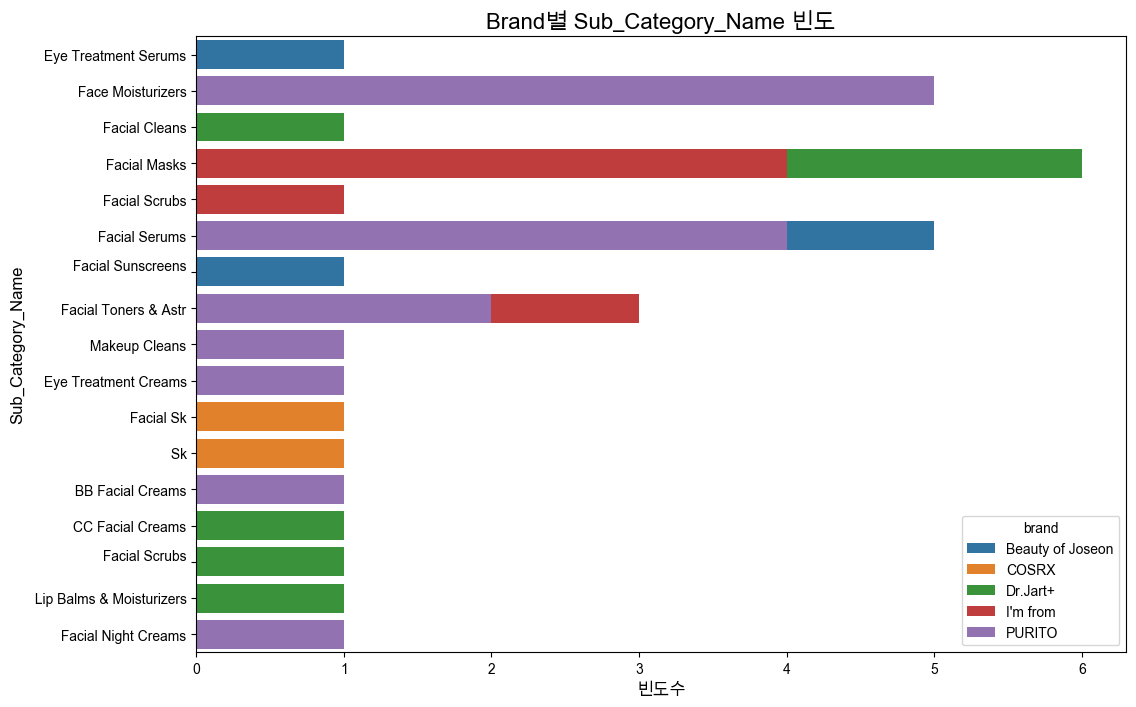

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 브랜드별 Sub_Category 빈도 계산
sub_category_counts = top_items_per_brand.explode('Sub_Category_Name')\
    .groupby(['brand', 'Sub_Category_Name']).size().reset_index(name='count')

# 그래프 스타일 설정
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Sub_Category_Name', hue='brand', data=sub_category_counts, dodge=False)

# 그래프 제목 및 레이블 설정
plt.title('Brand별 Sub_Category_Name 빈도', fontsize=16)
plt.xlabel('빈도수', fontsize=12)
plt.ylabel('Sub_Category_Name', fontsize=12)
plt.show()


### 브랜드별 상위 10개 아이템 tokenized_title 빈도 계산

In [55]:
top_items_per_brand.columns

Index(['ASIN', 'title', 'order', 'Amazon_Category', 'brand', 'price',
       'global_rating_count', 'Special_Feature', 'total_star_mean', 'Benefits',
       'Description', 'Suggested use', 'Manufacturer', 'Country of Origin',
       'Item model number', 'Product Dimensions',
       'Is Discontinued By Manufacturer', 'UPC', 'Language', 'Category',
       'Sub_Category', 'Category_Rank', 'Category_Name', 'Sub_Category_Rank',
       'Sub_Category_Name', 'Ingredients', 'Manufacturer recommended age',
       'Date First Available', 'Batteries', 'Department', 'Package Dimensions',
       'is_bundle', 'stpw_processed_Description', 'stpw_processed_Ingredients',
       'stpw_processed_title', 'stemmed_Description', 'stemmed_Ingredients',
       'stemmed_title'],
      dtype='object')

In [56]:
# 브랜드별로 tokenized_title 평탄화 후 중복 제거
top_items_per_brand_tokenized_title = (
    top_items_per_brand[['brand', 'stpw_processed_title']]
    .groupby('brand')
    .agg(lambda x: list(set([item for sublist in x for item in sublist])))  # 내부 리스트 평탄화 후 중복 제거
)

top_items_per_brand_tokenized_title

stpw_processed_title
brand                                                              
Beauty of Joseon  [dead, serum, broad, essence, hydro, hydrating...
COSRX             [serum, ph, sap, renewal, filtrate, essence, s...
Dr.Jart+          [dry, korean, moisturizing, serum, cicapair, s...
I'm from          [dead, mugwort, serum, herb, remove, cool, pol...
PURITO            [niacin, power, korean, kbeauty, serum, wrinkl...

In [59]:
filtered_data = top_items_per_brand_tokenized_title[top_items_per_brand_tokenized_title.index == "Beauty of Joseon"]
list1 = filtered_data['stpw_processed_title'].tolist()
for i in list1 :
    print(i)

['dead', 'serum', 'broad', 'essence', 'hydro', 'hydrating', 'cleansing', 'spectrum', 'remover', 'acne', 'propolis', 'scrub', 'c', 'waterproof', 'retinal', 'green', 'balance', 'honey', 'scar', 'dry', 'korean', 'vitamin', 'puffy', 'discovery', 'men', 'soft', 'pigmentation', 'oil', 'calming', 'exfoliator', 'circles', 'women', 'ginseng', 'pore', 'gel', 'exfoliating', 'dark', 'oily', 'oz', 'centella', 'dull', 'prone', 'soothing', 'peeling', 'glow', 'red', 'moisturizer', 'kit', 'wrinkles', 'snail', 'spf', 'sunscreen', 'relief', 'cleanser', 'peptide', 'revive', 'sensitive', 'bags', 'refreshing', 'acneprone', 'rice', 'uv', 'panthenol', 'tone', 'combination', 'correction', 'blossom', 'water', 'irritated', 'eye', 'sebum', 'moisturizing', 'spot', 'mucin', 'tea', 'cream', 'boost', 'ground', 'niacinamide', 'ml', 'daily', 'bean', 'hanbang', 'fl', 'cells', 'toner', 'light', 'mud', 'uneven', 'body', 'apricot', 'sun', 'correcting', 'replenishing', 'balm', 'radiance']


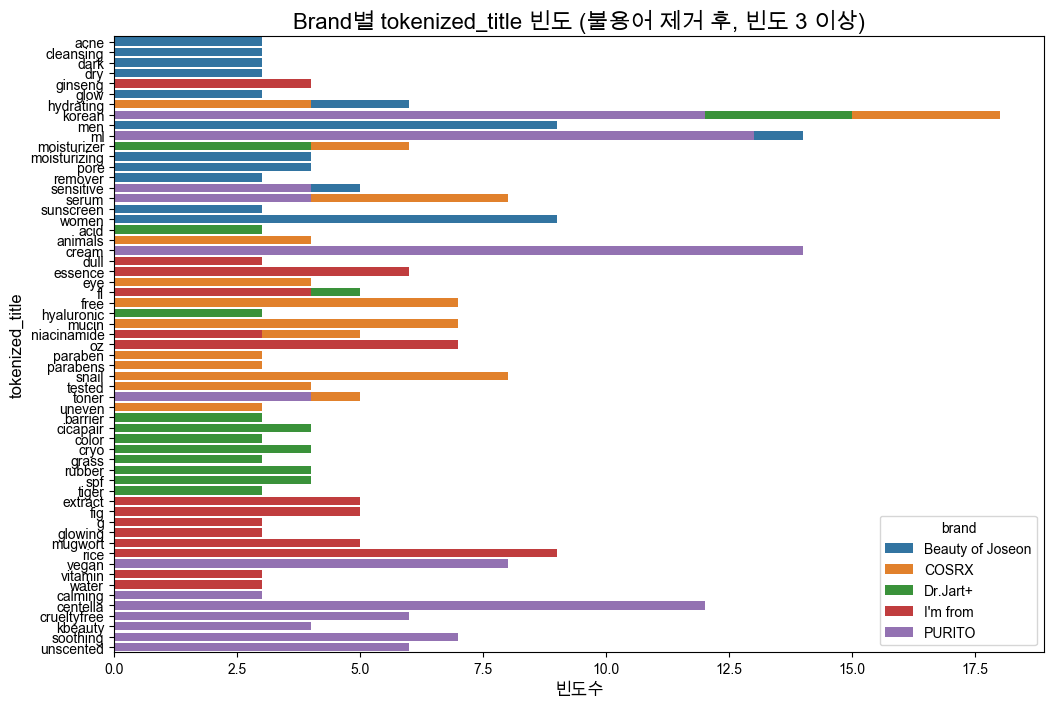

In [60]:
count = 3
# 불용어 제거
top_items_per_brand['filtered_tokenized_title'] = top_items_per_brand['stpw_processed_title'].apply(remove_stopwords)

# 빈도 계산
sub_category_counts = top_items_per_brand.explode('filtered_tokenized_title')\
    .groupby(['brand', 'filtered_tokenized_title']).size().reset_index(name='count')

# 빈도가 1 이상인 항목만 필터링
sub_category_counts_filtered = sub_category_counts[sub_category_counts['count'] >= count]

# NaN 값 및 'nan' 문자열 제외
sub_category_counts_filtered = sub_category_counts_filtered.dropna(subset=['filtered_tokenized_title'])
sub_category_counts_filtered = sub_category_counts_filtered[sub_category_counts_filtered['filtered_tokenized_title'] != 'nan']


# 그래프 스타일 설정
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count', 
    y='filtered_tokenized_title', 
    hue='brand', 
    data=sub_category_counts_filtered, 
    dodge=False
)

# 그래프 제목 및 레이블 설정
plt.title(f'Brand별 tokenized_title 빈도 (불용어 제거 후, 빈도 {count} 이상)', fontsize=16)
plt.xlabel('빈도수', fontsize=12)
plt.ylabel('tokenized_title', fontsize=12)
plt.show()


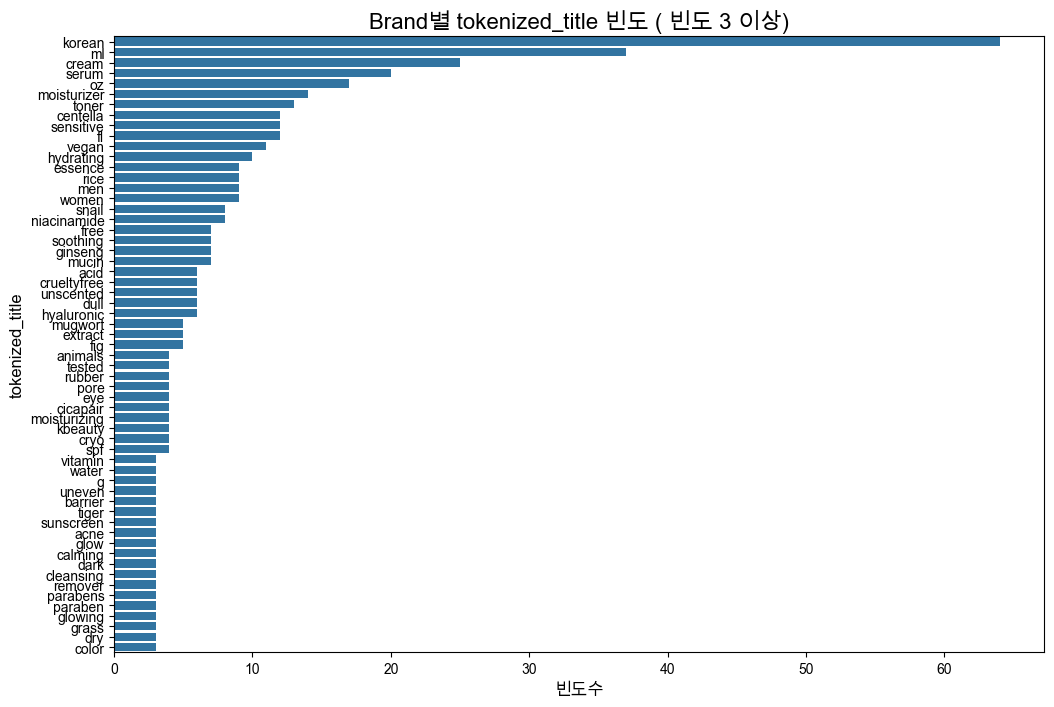

In [61]:
count = 3

# 불용어 제거
top_items_per_brand['filtered_tokenized_title'] = top_items_per_brand['stpw_processed_title'].apply(remove_stopwords)

# 빈도 계산
sub_category_counts = top_items_per_brand.explode('filtered_tokenized_title')\
    .groupby(['brand', 'filtered_tokenized_title']).size().reset_index(name='count')

# 빈도가 1 이상인 항목만 필터링
sub_category_counts_filtered = sub_category_counts[sub_category_counts['count'] >= count]

# NaN 값 및 'nan' 문자열 제외
sub_category_counts_filtered = sub_category_counts_filtered.dropna(subset=['filtered_tokenized_title'])
sub_category_counts_filtered = sub_category_counts_filtered[sub_category_counts_filtered['filtered_tokenized_title'] != 'nan']

# filtered_tokenized_title 별로 count 합계 구하기
sub_category_counts_sum = sub_category_counts_filtered.groupby('filtered_tokenized_title')['count'].sum().reset_index()

# 빈도수 기준으로 내림차순 정렬
sub_category_counts_sorted = sub_category_counts_sum.sort_values(by='count', ascending=False)

# 그래프 스타일 설정
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count', 
    y='filtered_tokenized_title', 
    data=sub_category_counts_sorted, 
    dodge=False
)

# 그래프 제목 및 레이블 설정
plt.title(f'Brand별 tokenized_title 빈도 ( 빈도 {count} 이상)', fontsize=16)
plt.xlabel('빈도수', fontsize=12)
plt.ylabel('tokenized_title', fontsize=12)
plt.show()

### description, ingredient 


1. 아이템의 각 브랜드 별 자주 언급되는 성분이나 단어를 뽑고 싶고
2. 특정 키워드가 "global_rating_count" 에 영향을 미치는지, 어떤 값이 global_rating_count 에 가장 많은 영향을 미치는지 

데이터 분석을 진행하고 싶어.

가설검증 후 p-value 까지 뽑는 게 목표야.



In [293]:
amazon_reviews_df_copy.columns

Index(['review_num', 'ASIN', 'customer_id', 'customer_name', 'title',
       'review_rating', 'review_content', 'review_date', 'detected_language',
       'cleaned_title', 'cleaned_review', 'tokenized_title',
       'tokenized_review', 'stemmed_title', 'stemmed_review',
       'stpw_processed_title', 'stpw_processed_review'],
      dtype='object')

# wordcloud

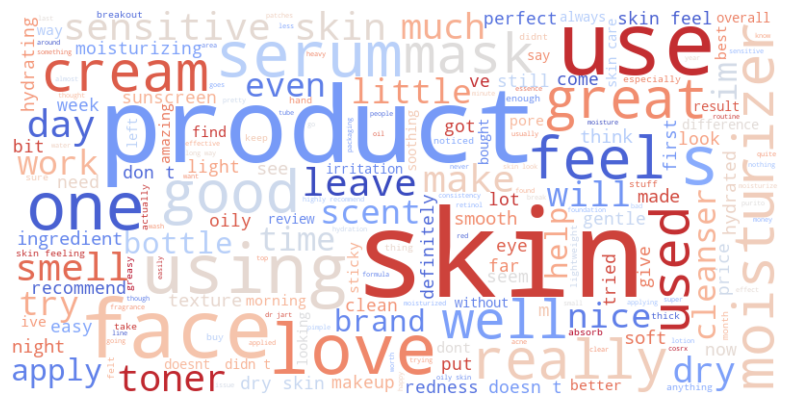

In [294]:
from wordcloud import WordCloud

# 전처리된 아마존 모든 리뷰 워드 클라우드
wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(amazon_reviews_df_copy['cleaned_review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Review")
plt.show()

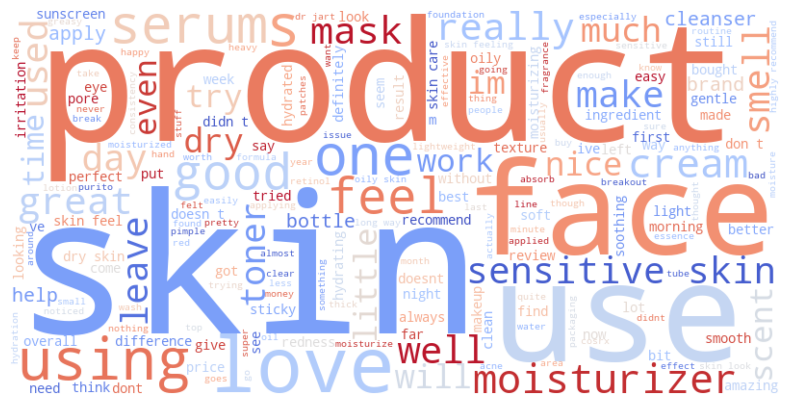

In [295]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 전처리된 아마존 모든 리뷰 워드 클라우드
wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(amazon_reviews_df_copy['cleaned_review'].dropna().apply(remove_stopwords)))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

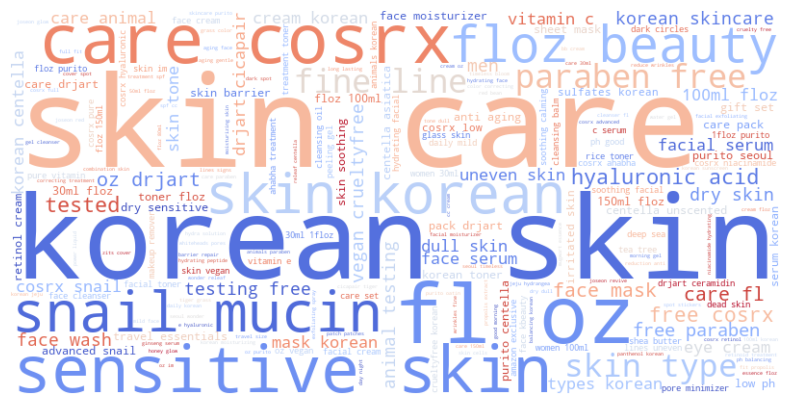

In [297]:
# 전처리된 상품 제목 (아이템 이름) 워드 클라우드
wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(amazon_reviews_df_copy['cleaned_title'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Title")
plt.show()

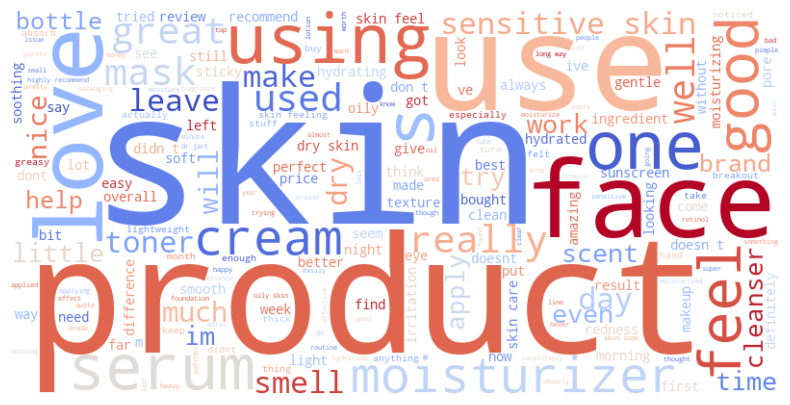

In [203]:
# top 30 브랜드 (평점 기준도 확인 필요) - 리뷰 내용 워드 클라우드 # 선정 브랜드 5개
top30_brand_list = brand_review_score['brand'].head(30).tolist()
query_cond = amazon_df_copy['brand'].isin(top30_brand_list)
top_df = amazon_df_copy[query_cond]

wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(top_df['cleaned_review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Title")
plt.show()

### amazon_review_stpw

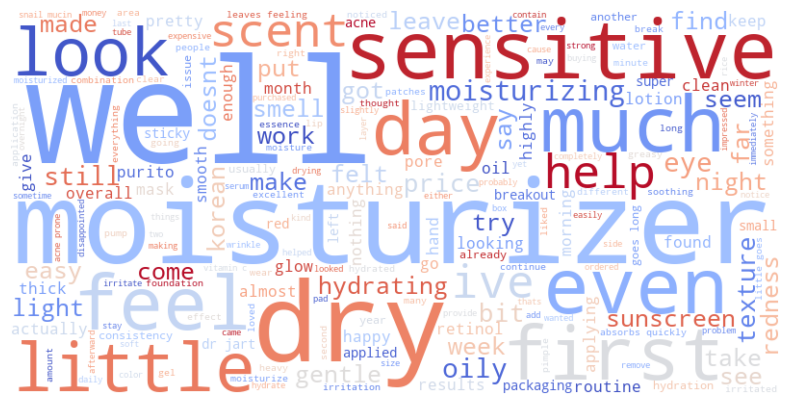

In [204]:
# 불용어 제거된 리뷰 데이터를 결합
processed_reviews = amazon_df_copy['stpw_processed_review'].dropna()

# 리스트를 문자열로 변환
review_text = ' '.join([' '.join(tokens) for tokens in processed_reviews])

# 워드 클라우드 생성
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='coolwarm'
).generate(review_text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




### ◼ Skinsort

In [205]:
import plotly.express as px
import plotly.io as pio

df = skinsort_copy

country_dist = df['country'].value_counts().reset_index()
country_dist.columns = ['Country', 'Count']

fig = px.pie(country_dist[:15], values='Count', names='Country', title=f"Country Distribution for Skinsort Brand Data")
fig.update_traces(hole=.3)
# imgname = "skinsort_country_distribution.png"
# fig.write_image(DATA_PATH+imgname)
fig.show()

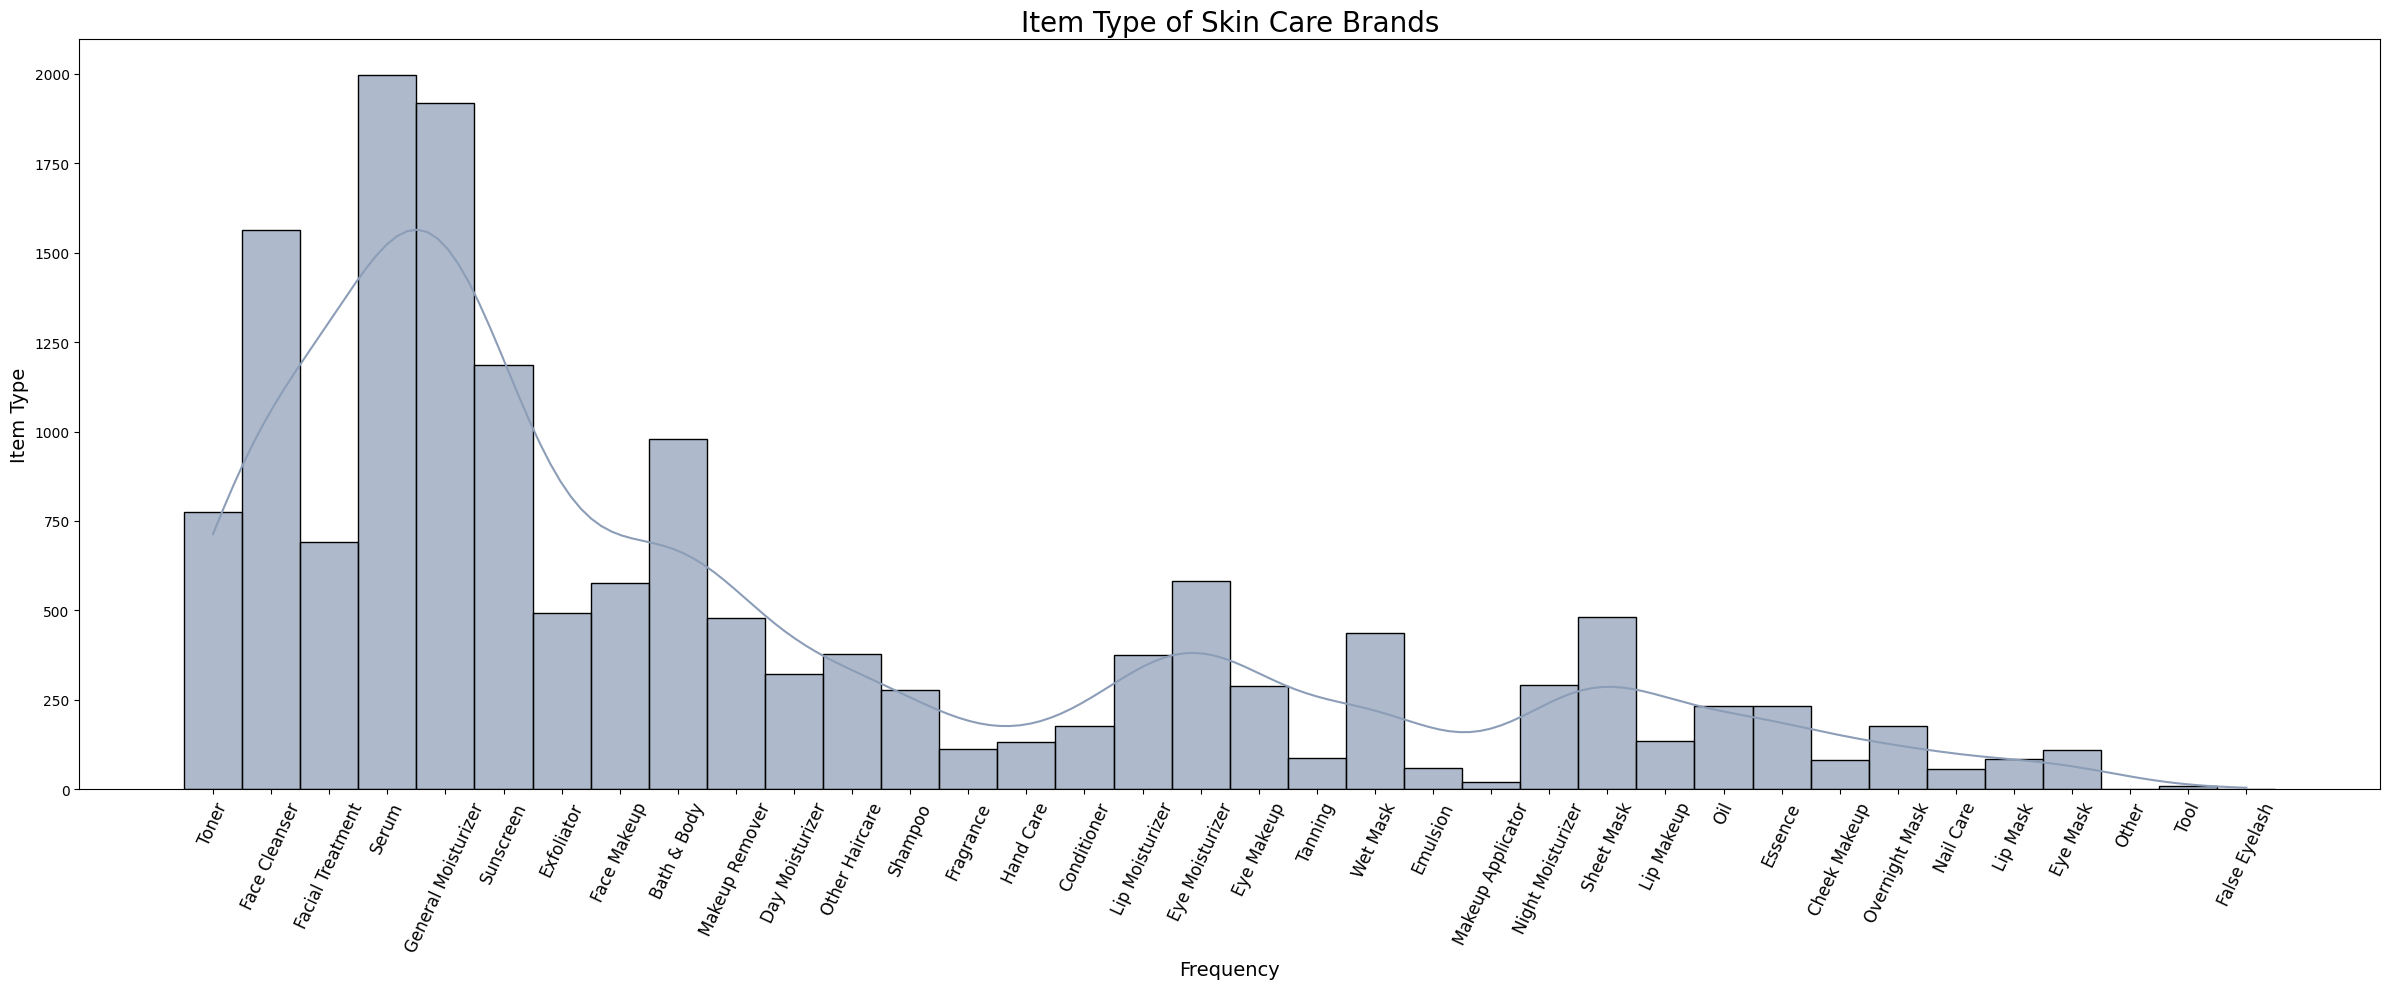

In [206]:
# 카테고리 분포
plt.figure(figsize=(24,10))
sns.histplot(data=skinsort_copy['type'], bins=31, alpha=0.7, color='#8C9DB7', kde=True)
plt.title('Item Type of Skin Care Brands', fontsize=20)

plt.xticks(rotation=65, fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Item Type', fontsize=14)

plt.tight_layout()
plt.show()

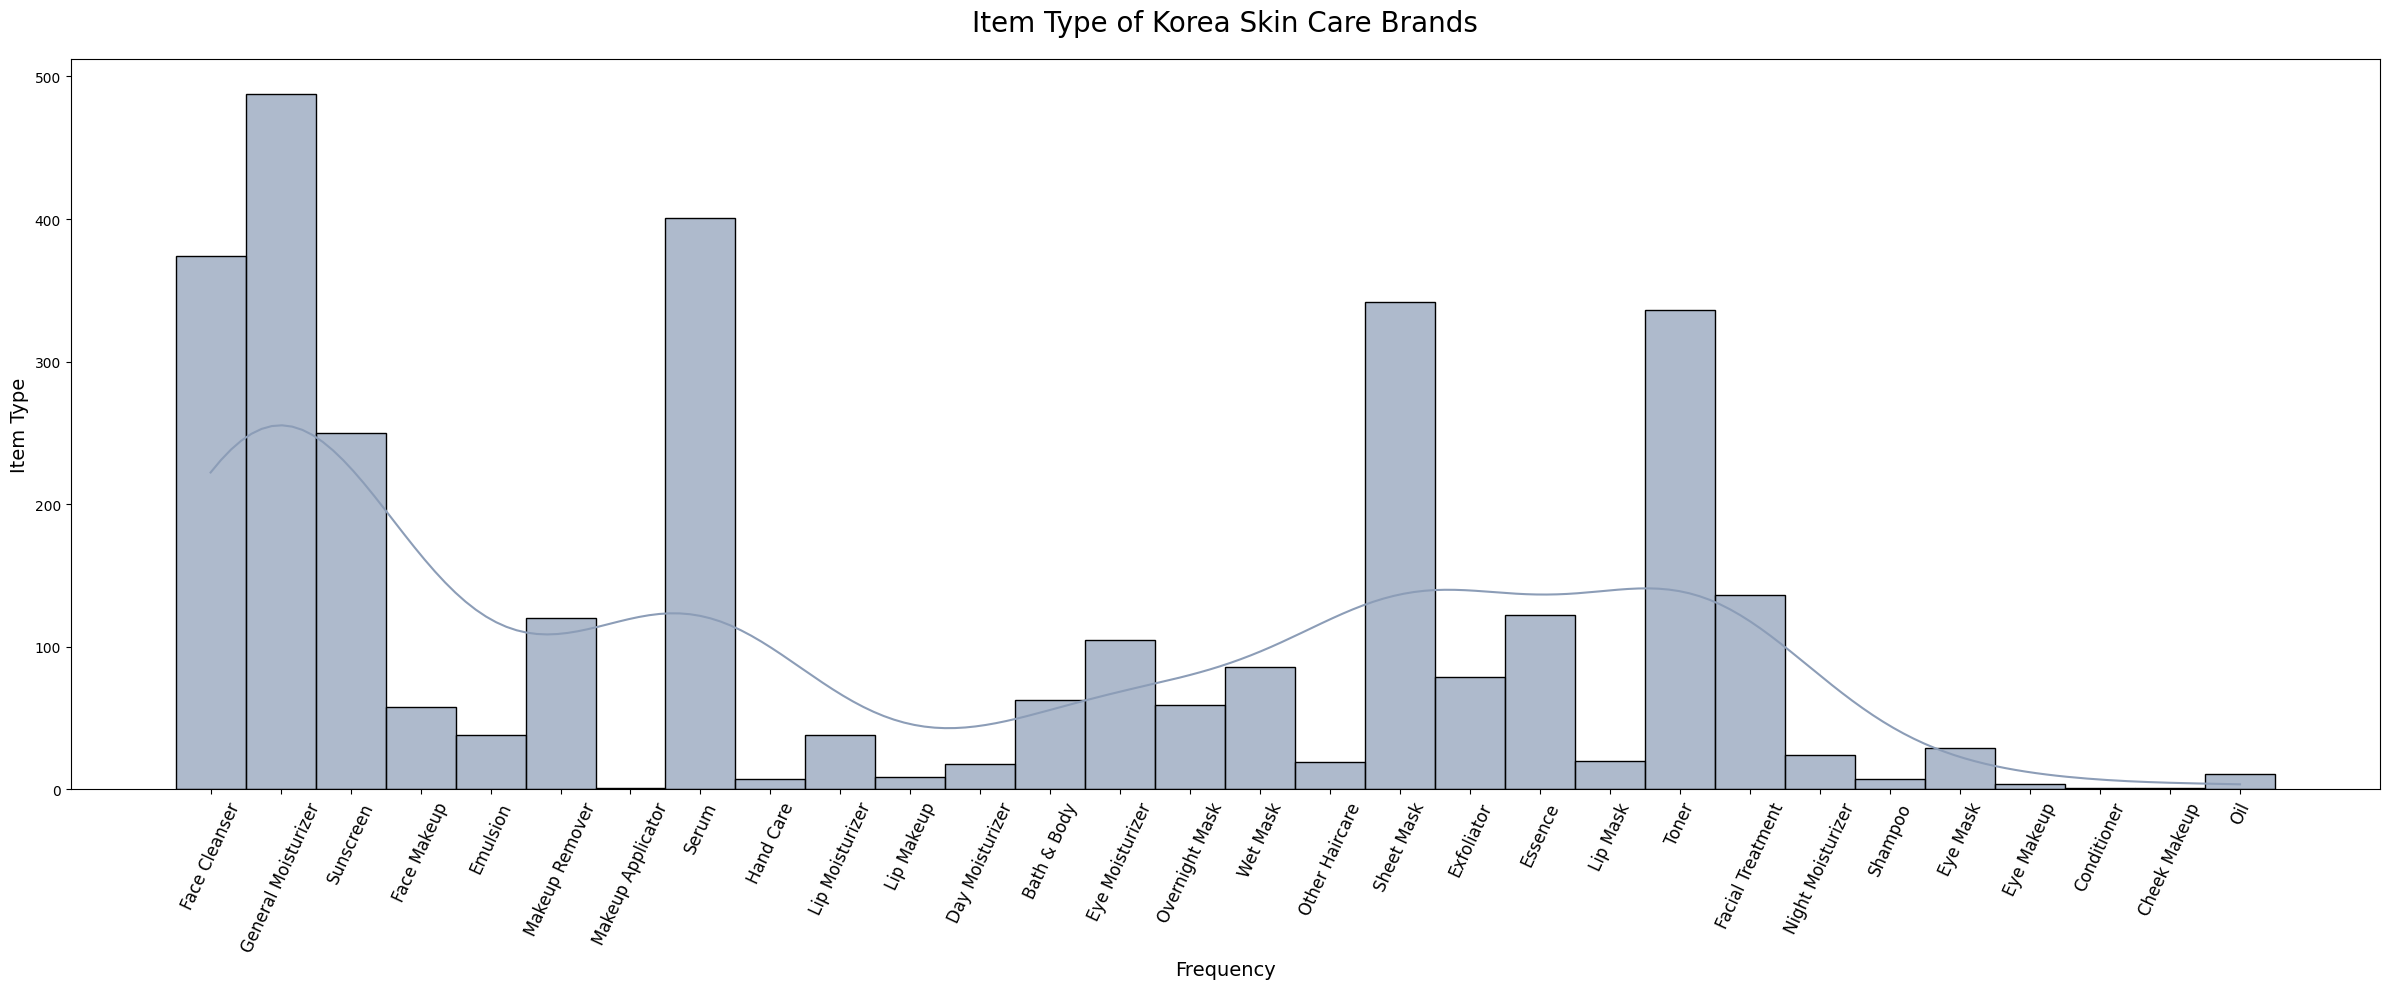

In [207]:
# 한국 스킨케어 브랜드들의 제품 타입 분포
# skincare 데이터셋 활용용
query_cond = "country == 'South Korea'"
k_skin_brand = skinsort_copy.query(query_cond).reset_index()
k_skin_brand.drop(columns='index', inplace=True)
k_skin_brand.head(2)

plt.figure(figsize=(24,10))

sns.histplot(data=k_skin_brand['type'], bins=31, alpha=0.7, color='#8C9DB7', kde=True)
plt.title('Item Type of Korea Skin Care Brands', fontsize=20, pad=20)

plt.xticks(rotation=65, fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Item Type', fontsize=14)

plt.tight_layout()
plt.show()

> Skinsort 한국 스킨케어 브랜드의 제품 유형 분포
- 일반적으로 알고 있는 것과 비슷함. general moisture, serum, sheet mask, toner 등 기초 제품들과 마스크팩이 많음 !

In [208]:
k_skin_brand.head(2)

level_0  brand                                name                 type  \
0        4  COSRX    Low pH Good Morning Gel Cleanser        Face Cleanser   
1        7  COSRX  Advanced Snail 92 All In One Cream  General Moisturizer   

       country                                        ingridients  \
0  South Korea  Water,Cocamidopropyl Betaine,Sodium Lauroyl Me...   
1  South Korea  Snail Secretion Filtrate,Betaine,Caprylic/Capr...   

                                            afterUse  \
0  Good For Oily Skin,Reduces Irritation,Reduces ...   
1  Redness Reducing,Reduces Irritation,May Worsen...   

                                 cleaned_ingridients  \
0  watercocamidopropyl betainesodium lauroyl meth...   
1  snail secretion filtratebetainecapryliccapric ...   

                                    cleaned_afterUse  \
0  good for oily skinreduces irritationreduces la...   
1  redness reducingreduces irritationmay worsen o...   

                               tokenized_ingridients  \
0  [watercocamidopropyl, betainesodium, lauroyl, ...   
1  [snail, secretion, filtratebetainecapryliccapr...   

                                  tokenized_afterUse  \
0  [good, for, oily, skinreduces, irritationreduc...   
1  [redness, reducingreduces, irritationmay, wors...   

                                 stemmed_ingridients  \
0  [watercocamidopropyl, betainesodium, lauroyl, ...   
1  [snail, secret, filtratebetainecapryliccapr, t...   

                                    stemmed_afterUse  \
0  [good, for, oili, skinreduc, irritationreduc, ...   
1  [red, reducingreduc, irritationmay, worsen, oi...   

                          stpw_processed_ingridients  \
0  [watercocamidopropyl, betainesodium, lauroyl, ...   
1  [snail, secretion, filtratebetainecapryliccapr...   

                             stpw_processed_afterUse  
0  [oily, skinreduces, irritationreduces, large, ...  
1  [redness, reducingreduces, irritationmay, wors...

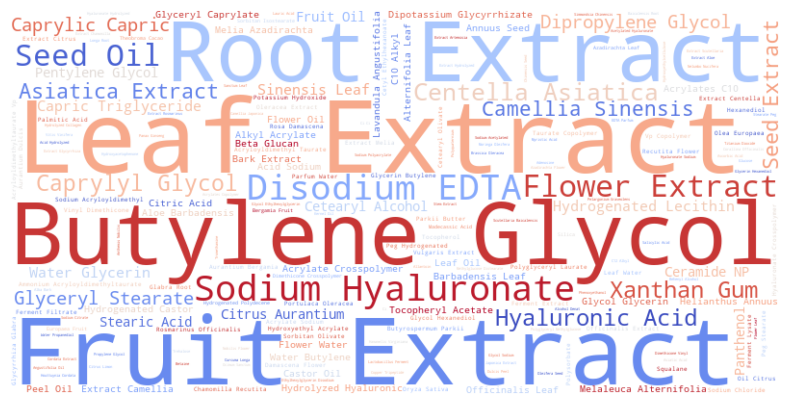

In [209]:
# 한국 스킨케어 브랜드 성분
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(k_skin_brand['ingridients'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Review")
plt.show()

브랜드 나눠서 클러스터링
제품, 성분, 사용효과

0. 브랜드로 찢고 //
1. 아이템 카테고리로 찢고 // 성분 찢고 // 효과 찢고
2. 

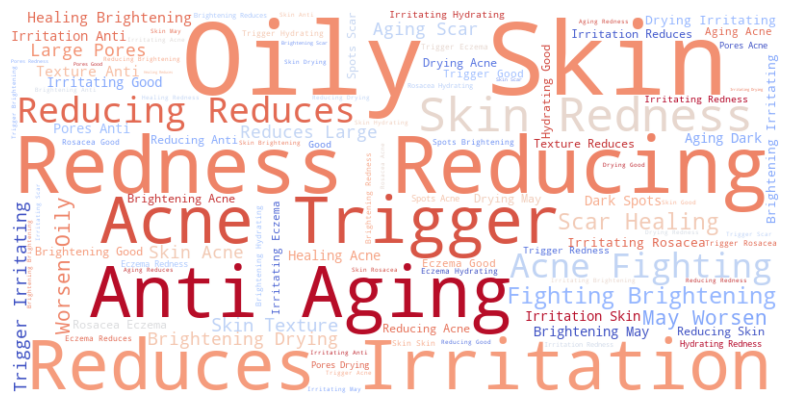

In [210]:
# 한국 스킨케어 브랜드 - 사용후
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', colormap='coolwarm').generate(' '.join(k_skin_brand['afterUse'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Review")
plt.show()

> 사용 후 반응
- 피부 타입 개인 차에 따른 반응들이 여기도 많음. 더 기름이 심해졌다, 건조하다 등
- 간지러움, 붉어짐 등 -> 개인적인 생각이지만 너무 특이한 성분? 약초나 시카 성분 등 자연성분을 강조한다고 너무 특이한 게 들어가면 개인 차를 많이 타는 것 같음

# PART 3: Data Analysis

### ◼ Amazon

#### Sentiment Analysis

In [211]:
k_skin_brand.dropna(subset=['ingridients'], inplace=True)
k_skin_brand['splitted_ingridients'] = k_skin_brand['ingridients'].apply(lambda x: str(x).split(',') if pd.notna(x) else [])

print(k_skin_brand['splitted_ingridients'].head())

k_skin_brand.dropna(subset=['afterUse'], inplace=True)
k_skin_brand['splitted_afterUse'] = k_skin_brand['afterUse'].apply(lambda x: str(x).split(',') if pd.notna(x) else [])

print(k_skin_brand['splitted_afterUse'].head())

0    [Water, Cocamidopropyl Betaine, Sodium Lauroyl...
1    [Snail Secretion Filtrate, Betaine, Caprylic/C...
2    [Water, Oryza Sativa Extract 30%, Dibutyl Adip...
3    [Water, Octocrylene, Citrullus Lanatus Fruit E...
4    [Water, Cyclopentasiloxane, Ethylhexyl Methoxy...
Name: splitted_ingridients, dtype: object
0    [Good For Oily Skin, Reduces Irritation, Reduc...
1    [Redness Reducing, Reduces Irritation, May Wor...
2    [Good For Oily Skin, Redness Reducing, Acne Fi...
3    [Drying, May Worsen Oily Skin, Acne Trigger, I...
4    [Good For Oily Skin, Redness Reducing, Brighte...
Name: splitted_afterUse, dtype: object


<Figure size 800x600 with 0 Axes>

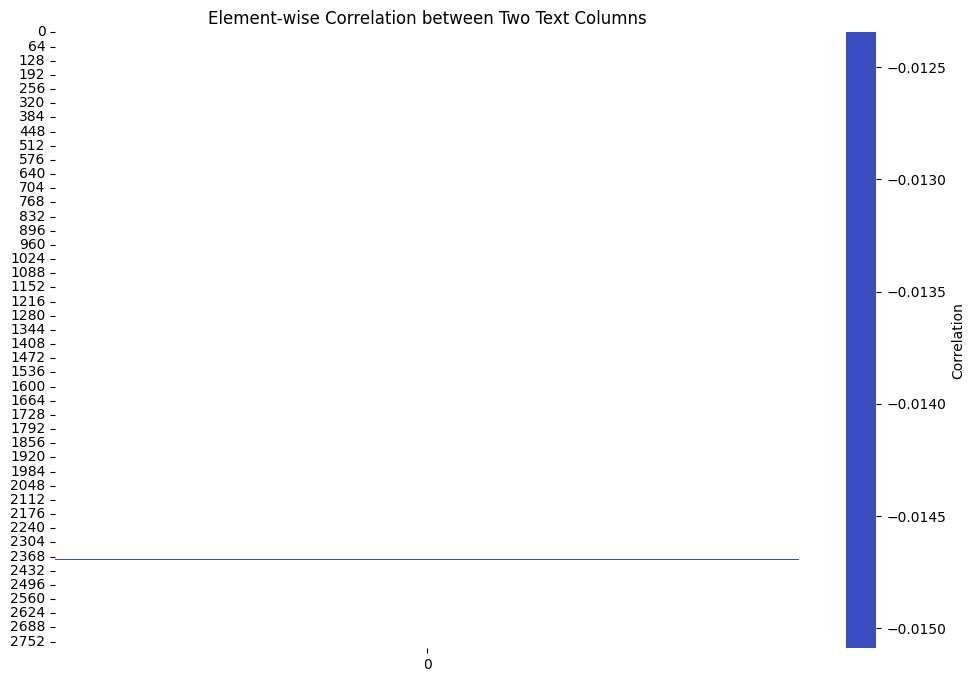

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure columns are lists of strings
column1_texts = [' '.join(ingredients) for ingredients in k_skin_brand.splitted_ingridients]
column2_texts = [' '.join(after_use) for after_use in k_skin_brand.splitted_afterUse]

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer()
column1_vectors = vectorizer.fit_transform(column1_texts)
column2_vectors = vectorizer.transform(column2_texts)

import numpy as np
from scipy.stats import pearsonr

correlations = []
for i in range(column1_vectors.shape[1]):
    try:
        # Calculate Pearson correlation for each feature
        corr, _ = pearsonr(column1_vectors[:, i].toarray().flatten(), 
                        column2_vectors[:, i].toarray().flatten())
        correlations.append(corr)
    except Exception as e:
        # Handle cases where Pearson correlation fails
        correlations.append(np.nan)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(np.array(correlations).reshape(-1, 1), 
            cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Element-wise Correlation between Two Text Columns')
plt.show()

In [215]:
# 감성 분석을 위한 코드
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer, which is part of the VADER sentiment analysis tool.
analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis to each review.
# The function takes in a 'review' (text) and returns the polarity scores, which include
# 'compound', 'positive', 'negative', and 'neutral' sentiment values.
def get_sentiment(review):
    return analyzer.polarity_scores(review)

# Apply the 'get_sentiment' function to each entry in the 'Cleaned_Review' column.
# Store the resulting sentiment scores (dictionary) in a new column 'vader_scores'.
amazon_df_copy['cleaned_review'] = amazon_df_copy['cleaned_review'].astype(str)
amazon_df_copy['vader_scores'] = amazon_df_copy['cleaned_review'].apply(get_sentiment)

k_skin_brand['afterUse'] = k_skin_brand['afterUse'].astype(str)
k_skin_brand['vader_scores'] = k_skin_brand['afterUse'].apply(get_sentiment)

# Extract the 'compound' score from the 'vader_scores' dictionary for each review.
# The 'compound' score is a normalized score ranging from -1 (most negative) to +1 (most positive),
# summarizing the overall sentiment of the text.
amazon_df_copy['compound'] = amazon_df_copy['vader_scores'].apply(lambda score_dict: score_dict['compound'])
k_skin_brand['compound'] = k_skin_brand['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to classify the sentiment based on the 'compound' score.
# Scores >= 0.05 are classified as 'Positive', <= -0.05 as 'Negative', and anything in between as 'Neutral'.
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the 'classify_sentiment' function to the 'compound' score to get the overall sentiment
# classification (Positive, Negative, or Neutral) for each review.
amazon_df_copy['sentiment'] = amazon_df_copy['compound'].apply(classify_sentiment)
k_skin_brand['sentiment'] = k_skin_brand['compound'].apply(classify_sentiment)

# Display the first few rows of the DataFrame, showing the cleaned review text,
# the 'compound' sentiment score, and the classified 'sentiment'.
print(amazon_df_copy[['cleaned_review', 'compound', 'sentiment']].head(2))

                                      cleaned_review  compound sentiment
0  not as good as people hype it up to be i’ll us...   -0.5428  Negative
1  had to use this for a bit to give it a review ...    0.5423  Positive


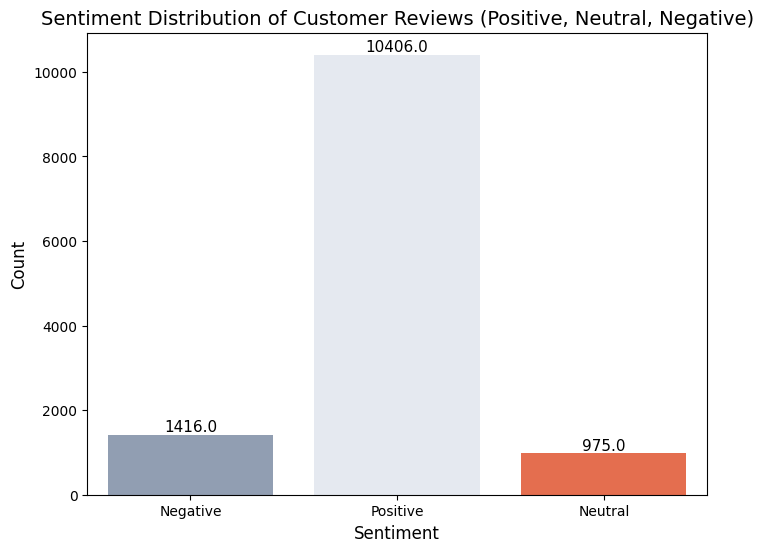

In [219]:
# 아마존
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=amazon_df_copy, x='sentiment', palette=skin_palette)

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

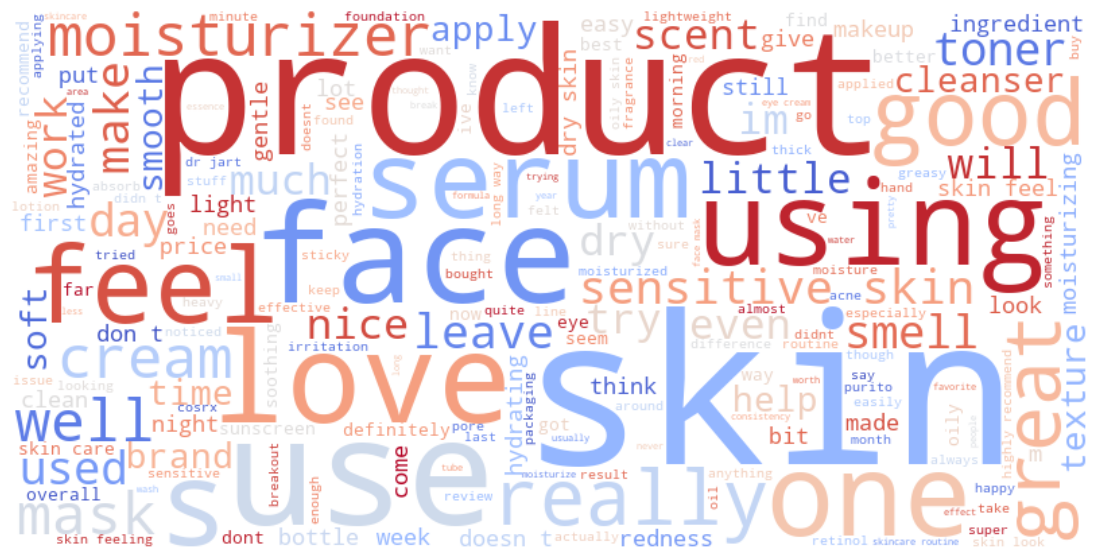

In [221]:
# 긍정적 리뷰 내용 - 워드 클라우드
query_cond = 'sentiment == "Positive"'
pos_df = amazon_df_copy.query(query_cond)
pos_df.reset_index(drop=True, inplace=True)

wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(pos_df['cleaned_review'].dropna()))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Title")
plt.show()

> 긍정 리뷰
- 수분 : hydration, hydrated, moisturing, moisture 
- 카테고리 : skin-care, make-up (카테고리인지, 메이크업할 때 잘 먹는다는 건지는 원본을 봐야알듯)
            skin, skin-care, skincare routine 등이 많음
- 아이템 : oil, serum, cleanser, toner, cream
- 시간 : morning, night ..
    
    - 스킨케어 루틴 중에 일상적으로 이용, 수분감 등 기능성에 긍정적 반응이 주로 (현재 샘플 데이터 기준)
    현재, K-beauty 의 경우 Skin care 쪽으로 미국에서 반응이 좋은데 이 부분과 일치하는 리뷰 내용임.

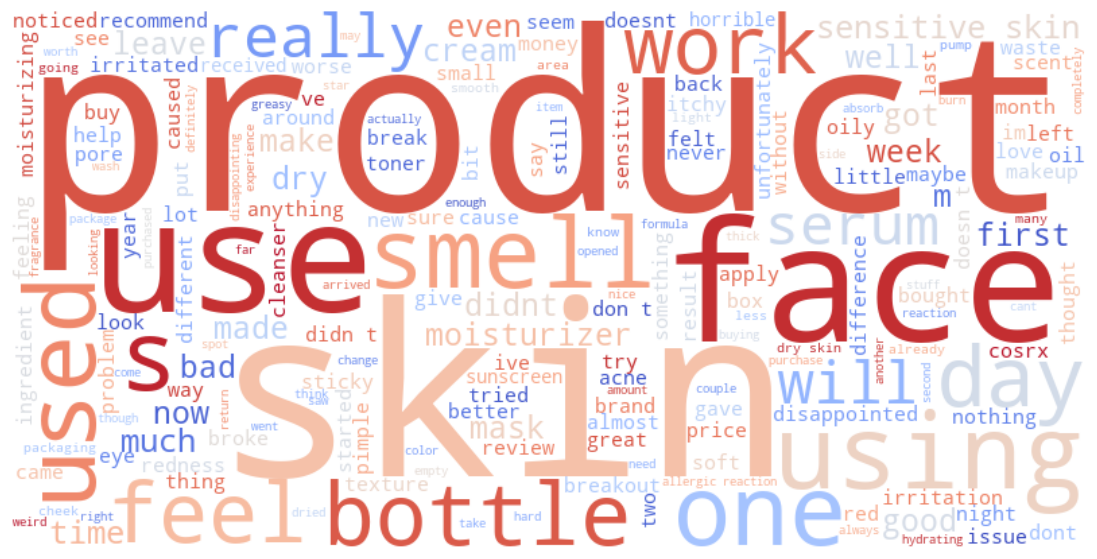

In [222]:
# 부정정적 리뷰 내용 - 워드 클라우드
query_cond = 'sentiment == "Negative"'
neg_df = amazon_df_copy.query(query_cond)
neg_df.reset_index(drop=True, inplace=True)

wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(neg_df['cleaned_review'].dropna()))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Title")
plt.show()

> 부정 리뷰
- dry <-> sticky, expected (기대치에 떨어진듯), money (돈이 아깝다는 건지, 비싸다는 건지 리뷰 원본 봐야됨), waste, damaged (제품 패키지가 손상? 본인의 피부가 손상?), horrible..

    - 건조하다 <-> 끈적거린다 : 이거는 고객 피부 타입별로 맞춤형 필요해보임
        waste, damaged, horrible 등 최악의 평가를 받은 리뷰는 내용 확인해볼 필요 있어보임.

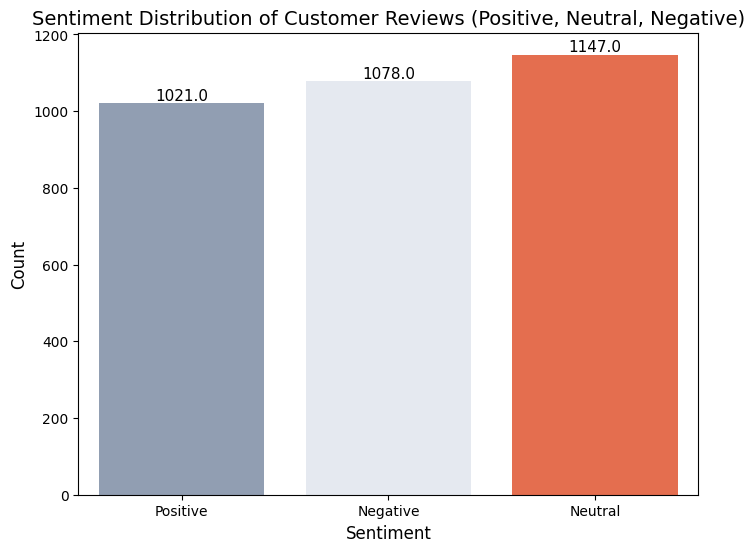

In [223]:
# 스킨쏘트
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=k_skin_brand, x='sentiment', palette=skin_palette)

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

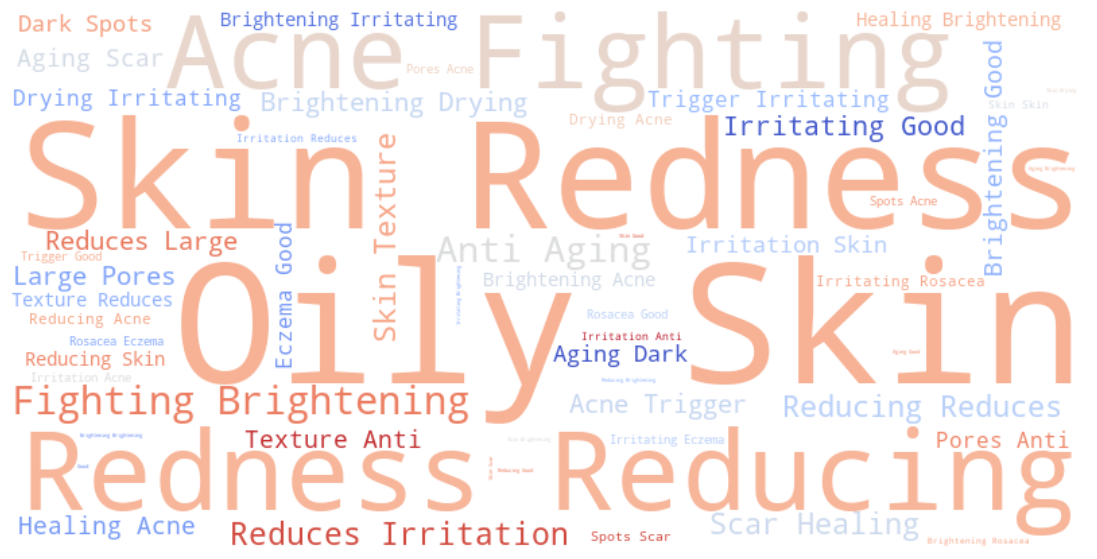

In [224]:
# 긍정적 리뷰 내용 - 워드 클라우드
query_cond = 'sentiment == "Positive"'
pos_df = k_skin_brand.query(query_cond)
pos_df.reset_index(drop=True, inplace=True)

wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(pos_df['afterUse'].dropna()))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Title")
plt.show()

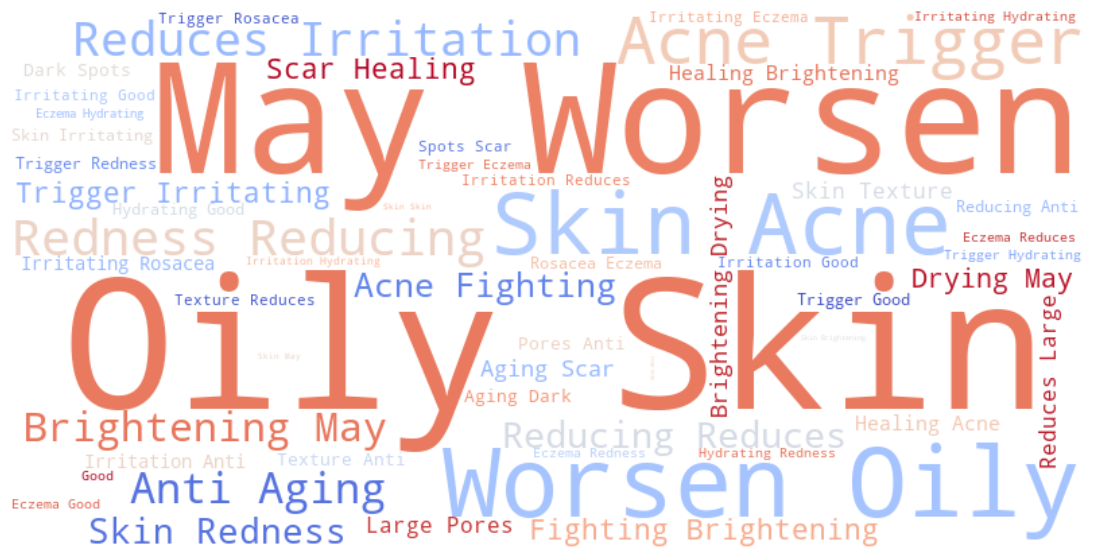

In [225]:
# 부정적 리뷰 내용 - 워드 클라우드
query_cond = 'sentiment == "Negative"'
pos_df = k_skin_brand.query(query_cond)
pos_df.reset_index(drop=True, inplace=True)

wordcloud = WordCloud(width=800, height=400, 
                    background_color='white', colormap='coolwarm').generate(' '.join(pos_df['afterUse'].dropna()))
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title("Word Cloud - Item Title")
plt.show()

#### Topic Modeling

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

> 토픽 모델링을 저희가 가진 컬럼 별로 더 상세하게 진행해해보면, 의미있는 주제 별로 정리해볼 수 있을 것 같습니다.
- 현재 아래 코드 적용된 예시) 아마존 데이터의 리뷰 데이터
- (추가 아이디어) 
 - skinsort 에 afterUse 컬럼 (사용효과) : 수분있는, 보습잘되는, 자극없는, 트러블안생기는 .. 등
 - 아마존이나 스킨쏘트 데이터에 성분 컬럼: 성분들 토픽 별로 묶음
 - 피부 타입에 대한 게 있으면 또 좋을 것 같음: ?

In [226]:
# 내용 추가된 부분!
# 어떻게 활용할 수 있을지 생각해보기!

In [359]:
# Prepare data for LDA Analysis
import gensim
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

kbeauty_stopwords = {
    "kbeauty", "beauty", "skincare", "cosmetics", "product", "products","use", "using",
    "skin", "care", "makeup", "cream", "serum", "mask", "sheet", "toner", "cleanser",
    "best", "top", "favorite", "amazing", "perfect", "affordable",
    "good", "bad", "great", "recommend", "use", "review", "love","brand", "brands", "item", "items", "category", "categories", "line", "lines","formula", "formulas", "ingredient", "ingredients", "collection", "collections",
"set", "sets", "value", "values", "pack", "packs","new", "latest", "exclusive", "limited", "special", "natural", "organic","premium", "luxury", "high-end", "affordable", "cheap", "popular", "trending","quality", "safe", "effective", "innovation", "innovative",
"worked", "works", "doesn't", "didn't", "okay", "fine", "worth", "worthless","amazing", "awesome", "perfect", "nice", "okay", "awful", "terrible", "horrible","face", "feel","really","stuff","skin","used","time", "dont","makes","tried","one","skin feel","lot","trying","buy","apply","quite","way","never","bought", "cosrx","always","less",
"time","without","absolutely","might","maybe","sure","think","though", "getting","want","result","know", "especially","dr jart","feel","didnt","dosent","purchase","definitely","bottle","im","thing","wash","smell","started","need","fragrance","mask","type","facial","another","noticed","actually", "people","money","got","box","every","another","found","jart","wear"
,"drjart","nan","1"}


# 기존 stop_words와 K-beauty 불용어 합치기
custom_stopwords = stop_words.extend(kbeauty_stopwords)



def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in custom_stopwords] for doc in texts]
    
data = amazon_reviews_df_copy.stpw_processed_review.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

TypeError: argument of type 'NoneType' is not iterable

In [230]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [231]:
# LDA model training
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"like" + 0.009*"dry" + 0.008*"would" + 0.007*"sensitive" + '
  '0.007*"well" + 0.006*"soft" + 0.006*"acne" + 0.006*"oily" + 0.005*"little" '
  '+ 0.005*"feels"'),
 (1,
  '0.014*"like" + 0.013*"feels" + 0.013*"well" + 0.011*"moisturizer" + '
  '0.009*"sensitive" + 0.008*"little" + 0.008*"soft" + 0.006*"first" + '
  '0.006*"also" + 0.005*"night"'),
 (2,
  '0.015*"like" + 0.012*"well" + 0.009*"feels" + 0.009*"dry" + 0.008*"get" + '
  '0.008*"oily" + 0.007*"also" + 0.007*"feeling" + 0.006*"doesnt" + '
  '0.006*"would"'),
 (3,
  '0.017*"like" + 0.008*"well" + 0.008*"ive" + 0.008*"feels" + 0.008*"also" + '
  '0.007*"moisturizer" + 0.007*"dry" + 0.007*"light" + 0.006*"little" + '
  '0.006*"would"'),
 (4,
  '0.016*"sensitive" + 0.014*"like" + 0.008*"well" + 0.008*"even" + '
  '0.007*"would" + 0.006*"dry" + 0.005*"moisturizer" + 0.005*"also" + '
  '0.005*"feels" + 0.004*"scent"'),
 (5,
  '0.026*"like" + 0.011*"dry" + 0.009*"also" + 0.008*"sensitive" + '
  '0.008*"feels" + 0.007*"h

In [233]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# Create directory if it does not exist
if not os.path.exists('./results'):
    os.makedirs('./results')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.000540  0.000358       1        1  12.741328
6      0.005170  0.006012       2        1  11.352964
3      0.004182 -0.006860       3        1  10.886912
1     -0.022343 -0.013377       4        1  10.713646
4     -0.003984 -0.020079       5        1  10.642530
5      0.010951 -0.015460       6        1  10.272357
2     -0.015242  0.009316       7        1  10.177566
0     -0.018355 -0.009392       8        1  10.003767
8      0.046907  0.002645       9        1   6.734201
9     -0.007827  0.046836      10        1   6.474728, topic_info=                  Term         Freq        Total Category  logprob  loglift
38                 get  1121.000000  1121.000000  Default  30.0000  30.0000
49           sensitive  1827.000000  1827.000000  Default  29.0000  29.0000
161              scent  1125.000000  1125.000000  Default  28.0000  28.0000
870               soft  1096.000000  1096.000000  Default  27.0000  27.0000
34                 dry  1982.000000  1982.000000  Default  26.0000  26.0000
66                like  3921.000000  3921.000000  Default  25.0000  25.0000
143              feels  1648.000000  1648.000000  Default  24.0000  24.0000
347               oily   945.000000   945.000000  Default  23.0000  23.0000
756            absorbs   573.000000   573.000000  Default  22.0000  22.0000
210                ive   949.000000   949.000000  Default  21.0000  21.0000
636                oil   568.000000   568.000000  Default  20.0000  20.0000
24               light   900.000000   900.000000  Default  19.0000  19.0000
28                acne   694.000000   694.000000  Default  18.0000  18.0000
105               work   704.000000   704.000000  Default  17.0000  17.0000
331            quickly   651.000000   651.000000  Default  16.0000  16.0000
231        moisturizer  1410.000000  1410.000000  Default  15.0000  15.0000
746             leaves   839.000000   839.000000  Default  14.0000  14.0000
202            feeling  1088.000000  1088.000000  Default  13.0000  13.0000
421                far   504.000000   504.000000  Default  12.0000  12.0000
559           hydrated   774.000000   774.000000  Default  11.0000  11.0000
990            texture   877.000000   877.000000  Default  10.0000  10.0000
330               much  1258.000000  1258.000000  Default   9.0000   9.0000
35                even  1050.000000  1050.000000  Default   8.0000   8.0000
382               make   668.000000   668.000000  Default   7.0000   7.0000
104               well  2047.000000  2047.000000  Default   6.0000   6.0000
1340            gentle   729.000000   729.000000  Default   5.0000   5.0000
118             little  1338.000000  1338.000000  Default   4.0000   4.0000
1134               eye   570.000000   570.000000  Default   3.0000   3.0000
566                see   818.000000   818.000000  Default   2.0000   2.0000
405             doesnt   871.000000   871.000000  Default   1.0000   1.0000
10202          clenser     3.761641     4.623351   Topic1  -9.0307   1.8541
5536            spritz     2.845442     3.707165   Topic1  -9.3099   1.7958
6520              hada     4.638480     6.492075   Topic1  -8.8212   1.7241
6521              labo     4.618955     6.491443   Topic1  -8.8254   1.7200
6339     unsustainable     1.928179     2.789884   Topic1  -9.6990   1.6909
7195           sachets     1.928114     2.789811   Topic1  -9.6990   1.6909
5216            corsrx     1.928024     2.789736   Topic1  -9.6991   1.6909
10341           benton     1.927702     2.789386   Topic1  -9.6993   1.6908
9599         silkysoft     1.896634     2.793353   Topic1  -9.7155   1.6732
4439            ingest     1.865183     2.796636   Topic1  -9.7322   1.6553
671          timesaver     1.780317     2.794575   Topic1  -9.7788   1.6094
3933               ipl     1.747761     2.786172   Topic1  -9.7972   1.5940
664     colorcorrector     1.733018     2

############################ 데이터 정리 완료 ############################

############################# 위에까지 정리된 스크립트 입니당 ######################

### ◼ Skinsort

#### K-means Clustering

In [355]:
cond = '''brand=="I'm from" or brand=="Beauty of Joseon" or brand=="PURITO"'''
clustering_df = amazon_df_copy.query(cond)

NameError: name 'amazon_df_copy' is not defined

In [235]:
skinsort_clustering = skinsort_copy.query(cond)
skinsort_clustering.brand.value_counts()

brand
PURITO              46
I'm from            32
Beauty of Joseon    22
Name: count, dtype: int64

In [236]:
km_df = pd.merge(clustering_df, skinsort_clustering, how='inner', on='brand')
km_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203516 entries, 0 to 203515
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ASIN                             203516 non-null  object        
 1   title                            203516 non-null  object        
 2   order                            203516 non-null  int64         
 3   Amazon_Category                  203516 non-null  object        
 4   brand                            203516 non-null  object        
 5   price                            192748 non-null  float64       
 6   global_rating_count              203516 non-null  Int64         
 7   Special_Feature                  39848 non-null   object        
 8   total_star_mean                  203516 non-null  float64       
 9   Benefits                         0 non-null       object        
 10  Description                      0 non-null 

In [237]:
# 클러스터링 할 컬럼 지정
feature_names=['price','cleaned_title','type','ingridients', 'cleaned_ingridients','afterUse','cleaned_review','cleaned_afterUse']
base_df = pd.DataFrame(km_df, columns=feature_names)

In [238]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = base_df

# TF-IDF 벡터화 객체 생성
tfidf_vectorizer = TfidfVectorizer(
    max_features=10,  # 각 컬럼에서 최대 10개의 중요한 단어 선택
    stop_words="english",  # 불용어 제거
    ngram_range=(1, 2)  # 1~2그램 사용
)

# 컬럼별 TF-IDF 변환
tfidf_results = {}
for column in feature_names[1:]:
    # NaN 제거 후 TF-IDF 적용
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[column].dropna())
    
    # TF-IDF 결과를 데이터프레임으로 저장
    tfidf_results[column] = pd.DataFrame(
        tfidf_matrix.toarray(),
        columns=[f"{column}_{feature}" for feature in tfidf_vectorizer.get_feature_names_out()]
    )

# 결과 병합 (컬럼 이름으로 구분된 TF-IDF 결과)
final_tfidf_df = pd.concat(tfidf_results.values(), axis=1)

In [244]:
# 표준화
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_scale_df = imputer.fit_transform(final_tfidf_df)

# 표준화 방식: standard scaler (평균0, 분산1)
std_scale_df = StandardScaler().fit_transform(imputed_scale_df)

In [251]:
# 주성분 개수를 판단하기 위한 pca임의 시행 
pca = PCA(n_components=5)
pca.fit(std_scale_df)
# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.36275140655707394

In [252]:
# pca 시행
pca_df = pca.fit_transform(std_scale_df)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4','PC5'])  

# Show the first 5 firms
pca_df.head()

PC1       PC2       PC3       PC4       PC5
0 -3.213915 -2.805281  6.065043 -0.645070  2.031912
1  1.142197 -3.376000  0.499729  3.025758  0.102592
2  1.545813 -3.792080  2.998032  2.641501 -2.167357
3  1.339056 -3.696265  0.121904  2.393682 -2.105227
4  1.754567 -3.232922 -1.405028  3.712780 -1.969621

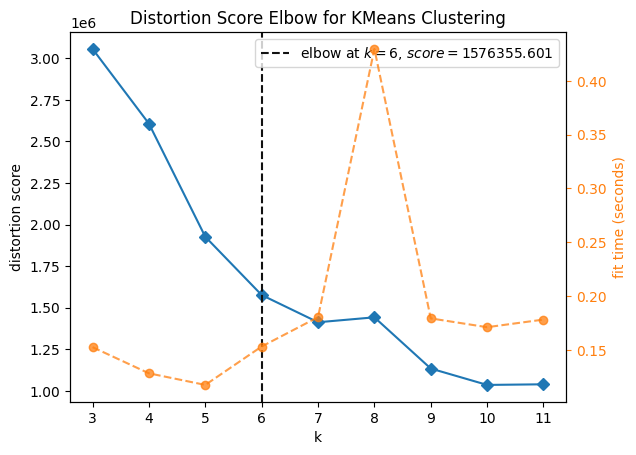

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [253]:
# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans()

# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(3,12))

# 데이터 적용 
visualizer.fit(pca_df) 
visualizer.show()   

/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/yellowbrick/cluster/icdm.py:390: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/yellowbrick/cluster/icdm.py:390: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

/opt/homebrew/Caskroom/miniconda/base/envs/leo4study/lib/python3.11/site-packages/yellowbrick/cluster/icdm.py:390: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'ne

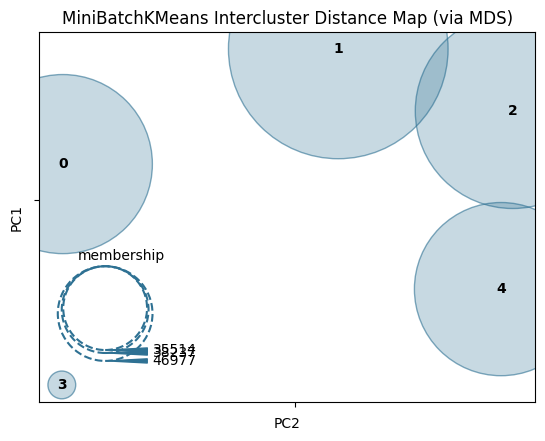

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=42))

In [254]:
# 초기 k 값 참고를 위한 distance map 시각화
#그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(5, random_state=42), pca_df)

In [255]:
#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=5, random_state=42, init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기 
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

In [256]:
# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df.groupby(['Cluster'])['PC1'].count().reset_index()

Cluster    PC1
0        0  17059
1        1  38209
2        2  27781
3        3  33489
4        4  86978

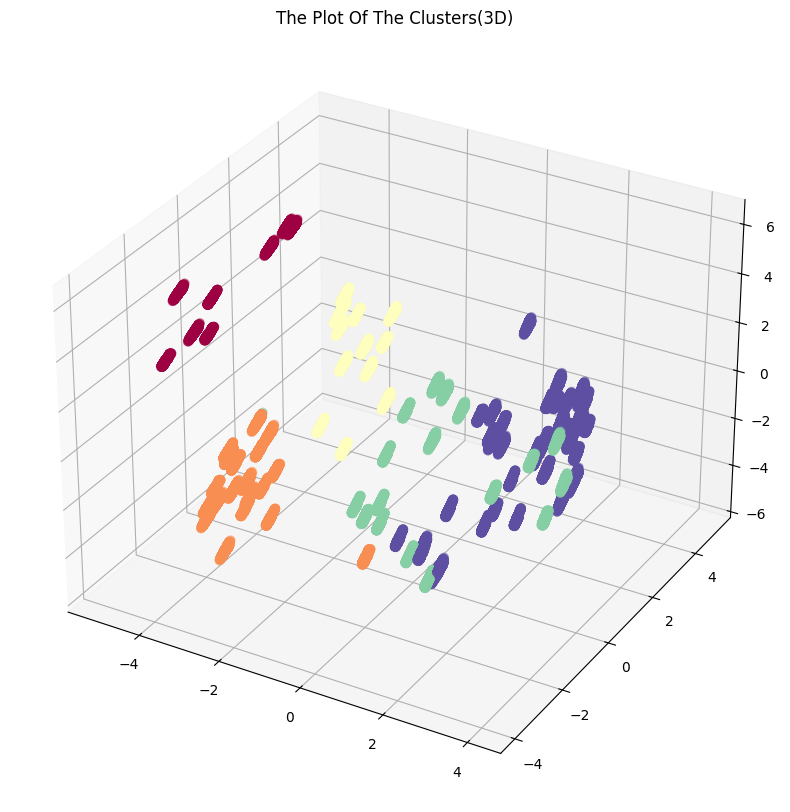

In [257]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

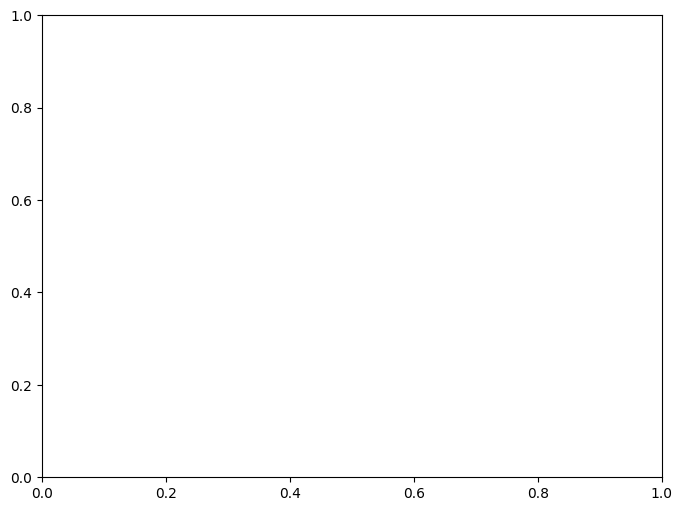

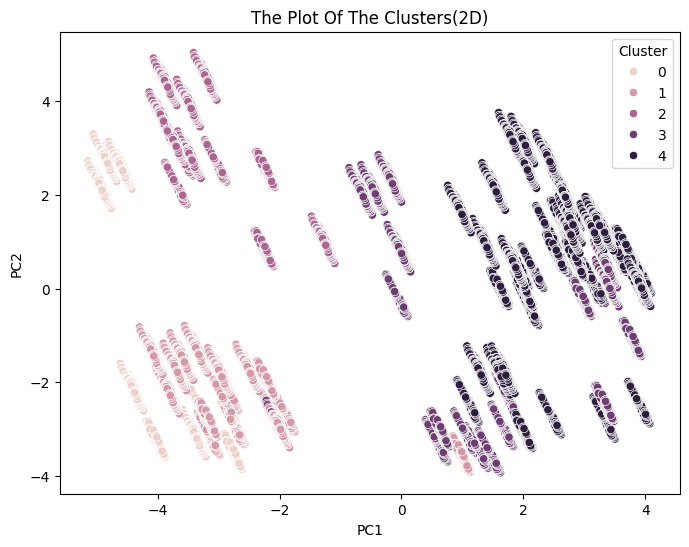

In [261]:
# 2차원으로 시각화

plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2',  hue='Cluster')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [26]:
brand_list

['Dr.Jart+', 'COSRX', "I'm from", 'Beauty of Joseon', 'PURITO']

In [27]:
amazon_df_copy.columns

Index(['ASIN', 'title', 'order', 'Amazon_Category', 'brand', 'price',
       'global_rating_count', 'Special_Feature', 'total_star_mean', 'Benefits',
       'Description', 'Suggested use', 'Manufacturer', 'Country of Origin',
       'Item model number', 'Product Dimensions',
       'Is Discontinued By Manufacturer', 'UPC', 'Language', 'Category',
       'Sub_Category', 'Category_Rank', 'Category_Name', 'Sub_Category_Rank',
       'Sub_Category_Name', 'index', 'review_num', 'customer_id',
       'customer_name', 'review_rating', 'review_content', 'review_date',
       'detected_language', 'Ingredients', 'Manufacturer recommended age',
       'Date First Available', 'Batteries', 'Department', 'Package Dimensions',
       'is_bundle'],
      dtype='object')

# PART 5: LLM chatbot

https://teddylee777.github.io/langchain/rag-tutorial/

1. 리뷰 많은 순 특징은 뭐가 있나
2. 리뷰 많은 시기
3. 매출에 영향을 줄 수 있는 지표
4. 노출수.
5. 최소로 추정
6. 브랜드 별 상위 아이템 특징
7. 키워드 사용 이점 ~ 키워드 사용 했을 때 얻는 이득( 다른 브랜드에 비해 ~단어 언급이 n 배 이상 많았다.) 
8. ~ 문제점
9. 봄여름가을 겨울 더빈 왓슨 검정


시계열 분석 ( 주식 등 )
- 자기상관성
- 정상성 조건
1. 평균 일정
2. 일정한 분산
3. 시차에만 의존하는 공분산

- 자기상관계수
부분 자기상관계수

자기 회귀 누적 이동 평균 모형(ARIMA : Autoregressive Integrated Moving Average)
	비정상 시계열 자료를 다룰 수 있는 모형으로 현실에 존재하는 대부분의 시계열 자료를 설명할 수 있다.
비정상 시계열이기 때문에 차분이나 변환을 통해 정상화할 수있다.
가장 이상적인 p,d,q 값을 R 을 활용해 찾아보는 실습 있음


분해 시계열
	시계열 추세, 계절, 순환, 불규칙 요인 등으로 구성. 서로 복잡하게 혼합되어 하나의 시계열 데이터를 구성.
분석 목적에 따라 특정 요인만 분리해 분석하거나 제거하는 작업 함. > 분해 시계열. 주로 회귀분석과 함께 사용.


o	ANOVA (Analysis of Variance): 세 그룹 이상의 평균 차이 검정.
금액에 따른 리뷰 점수